<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center>  Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 3. Визуальный анализ данных и построение признаков

На 3 неделе мы займемся визуальным анализом данных и построением признаков. Сначала мы вместе построим и проанализируем несколько признаков, потом Вы сможете сами придумать и описать различные признаки. 

**План 3 недели:**
 - Часть 1. Построение признаков
 - Часть 2. Визуальный анализ данных
 - Часть 3. Дальнейшее построение признаков
 - Часть 4. Проверка построенных признаков

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Поиск структуры в данных":**
   - [Задача визуализации](https://www.coursera.org/learn/unsupervised-learning/lecture/hlvlT/zadacha-vizualizatsii)
   - [Визуализация данных в sklearn](https://www.coursera.org/learn/unsupervised-learning/lecture/ityMo/vizualizatsiia-dannykh-v-sklearn)
   
**Также в задании будет использоваться библиотека Seaborn (ее можно дополнительно установить командой *pip install seaborn*), будет полезно обращаться к документациям [Matplotlib](http://matplotlib.org/users/) и [Seaborn](http://seaborn.pydata.org/), а также к примерам визуализации, описанным на StackOverflow.**



# Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1EbjK7-hF-Gepi6RH-K5I2XeiYGRoY0LNDx03QmLu9Xo). 

## Часть 1. Построение признаков

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from pandas import DataFrame as df
pd.set_option('display.max.columns', 25)
import pickle
#pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime
import statistics

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = "C://Users//user//PycharmProjects//DataProject//Data Storage//capstone_user_identification//"

**Создайте на основе функций *prepare_train_set* и *prepare_sparse_train_set_window*  новую – *prepare_train_set_with_fe*, (от "feature engineering"), создайте следующие признаки:**
- `session_timespan` – продолжительность сессии (разница между максимальным и минимальным временем посещения сайтов в сессии, в секундах)
- `#unique_sites` – число уникальных сайтов в сессии 
- `start_hour` – час начала сессии (то есть час в записи минимального timestamp среди десяти)
- `day_of_week` – день недели (то есть день недели в записи минимального timestamp среди десяти)

Функция должна возвращать новый DataFrame (как возвращала функция *prepare_train_set*), только признаков должно быть на 4 больше. Порядок, в котором добавляются признаки: *site1*, ... *site10*, *session_timespan*, *#unique_sites*, *start_hour*, *day_of_week* и *user_id* (это видно и чуть ниже по тому, как функция вызывается).

In [3]:
def prepare_train_set_with_fe(path_to_csv_files, site_freq_path, feature_names,
                                    session_length=10, window_size=10):
    ''' ВАШ КОД ЗДЕСЬ '''

In [4]:
def prepare_train_set_with_fe(path_to_csv_files, site_freq_path, constant_feature_names, session_length=10, window_size = 10):
    all_files_pathes = glob(path_to_csv_files + "*.csv")
    user_ids = []
    for i in range(len(all_files_pathes)):
        path_to_file = all_files_pathes[i]
        file_name_w_ext = os.path.basename(path_to_file)
        file_name = os.path.splitext(file_name_w_ext)
        user_ids.append(int(file_name[0][4:]))
    alternate_feature_names = ['site' + str(i) for i in range(1, session_length+1)] + \
                              ['time_diff' + str(i) for i in range(1, session_length)]

    feature_names = alternate_feature_names + constant_feature_names
    site_freq_file = open(site_freq_path, "rb")
    site_freq_3users = pickle.load(site_freq_file)
    final_strings_list = []
    y_users = []
    session_id = 0
    cols = []
    rows = []
    data = []
    rows_number = len(site_freq_3users.keys())
    # Перебираем все файлы из папки
    strings = []
    for i in range(len(all_files_pathes)):
        path_to_file = all_files_pathes[i]
        file_data_frame = pd.read_csv(path_to_file)
        timestamp = list(file_data_frame['timestamp'])
        sites = file_data_frame['site']
        site_number_id = 0
        timestamp_min = timestamp[0]
        timestamp_max = timestamp[-1]
        datetime_min = datetime.strptime(timestamp_min, '%Y-%m-%d %H:%M:%S')
        datetime_max = datetime.strptime(timestamp_max, '%Y-%m-%d %H:%M:%S')
        deltatime = datetime_max - datetime_min
        session_timespan = 0
        unique_sites_number = 0
        start_hour = 0
        tt = datetime_min.timetuple()
        day_of_week = 0
        target = 0

        while site_number_id < len(file_data_frame['site']):
            delta_sites_number = len(file_data_frame['site']) - site_number_id
            site_ids = []
            timediffs = []
            timediff = 0
            for j in range(0, session_length):
                try:
                    site_id = site_freq_3users[sites[site_number_id + j]][1]
                except:
                    site_id = 0
                site_ids.append(site_id)
            for j in range(1, session_length):
                try:
                    timestamp1 = timestamp[site_number_id + j]
                    timestamp2 = timestamp[site_number_id + j-1]
                    datetime_obj1 = datetime.strptime(timestamp1, '%Y-%m-%d %H:%M:%S')
                    datetime_obj2 = datetime.strptime(timestamp2, '%Y-%m-%d %H:%M:%S')
                    delta = datetime_obj1 - datetime_obj2
                    timediff = delta.seconds
                except:
                    timediff = 0
                timediffs.append(timediff)
            if delta_sites_number > session_length:
                timestamp_min = timestamp[site_number_id]
                timestamp_max = timestamp[site_number_id+session_length-1]
                datetime_min = datetime.strptime(timestamp_min, '%Y-%m-%d %H:%M:%S')
                datetime_max = datetime.strptime(timestamp_max, '%Y-%m-%d %H:%M:%S')
                deltatime = datetime_max - datetime_min
                session_timespan = deltatime.seconds
                unique_sites_number = len(np.unique(sites[site_number_id:site_number_id+session_length]))
                start_hour = datetime_min.hour
                tt = datetime_min.timetuple()
                day_of_week = tt.tm_wday
                target = user_ids[i]
            else:
                timestamp_min = timestamp[site_number_id]
                timestamp_max = timestamp[-1]
                datetime_min = datetime.strptime(timestamp_min, '%Y-%m-%d %H:%M:%S')
                datetime_max = datetime.strptime(timestamp_max, '%Y-%m-%d %H:%M:%S')
                deltatime = datetime_max - datetime_min
                session_timespan = deltatime.seconds
                unique_sites_number = len(np.unique(sites[site_number_id:]))
                start_hour = datetime_min.hour
                tt = datetime_min.timetuple()
                day_of_week = tt.tm_wday
                target = user_ids[i]
            # print(site_number_id + session_length-1)
            # print(timestamp[site_number_id + session_length-1])
            # timestamp_session_max_time = timestamp[site_number_id + session_length-1]
            # timestamp_session_min_time = timestamp[site_number_id]
            # session_timespan = (datetime.strptime(timestamp_session_max_time, '%Y-%m-%d %H:%M:%S') - datetime.strptime(timestamp_session_min_time, '%Y-%m-%d %H:%M:%S')).seconds
            string = site_ids + timediffs
            string.append(session_timespan)
            string.append(unique_sites_number)
            string.append(start_hour)
            string.append(day_of_week)
            string.append(target)
            site_number_id += window_size
            strings.append(string)
    strings_data_frame = pd.DataFrame(data=strings, columns=feature_names)
    return strings_data_frame

**Проверим функцию на игрушечном примере.**

In [5]:
feature_names = ['session_timespan', '#unique_sites', 'start_hour', 'day_of_week', 'target']
train_data_toy  = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, '3users//'), os.path.join(PATH_TO_DATA, 'site_freq_3users.pkl'), feature_names, session_length=10, window_size=10)

In [6]:
train_data_toy

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9,session_timespan,#unique_sites,start_hour,day_of_week,target
0,3,2,2,10,2,1,9,6,7,8,287,1184,6278,186,2,1,2,3,55,7998,8,9,4,1
1,3,1,1,1,0,0,0,0,0,0,2,3,55,0,0,0,0,0,0,60,2,12,4,1
2,3,2,5,5,2,0,0,0,0,0,287,1184,6278,186,0,0,0,0,0,7935,3,9,4,2
3,4,1,2,1,2,1,1,6,11,4,287,1184,6278,186,2,1,2,3,55,7998,5,9,4,3
4,4,1,2,0,0,0,0,0,0,0,287,1184,0,0,0,0,0,0,0,1471,3,12,4,3


In [7]:
print(train_data_toy)

   site1  site2  site3  site4  site5  site6  site7  site8  site9  site10  \
0      3      2      2     10      2      1      9      6      7       8   
1      3      1      1      1      0      0      0      0      0       0   
2      3      2      5      5      2      0      0      0      0       0   
3      4      1      2      1      2      1      1      6     11       4   
4      4      1      2      0      0      0      0      0      0       0   

   time_diff1  time_diff2  time_diff3  time_diff4  time_diff5  time_diff6  \
0         287        1184        6278         186           2           1   
1           2           3          55           0           0           0   
2         287        1184        6278         186           0           0   
3         287        1184        6278         186           2           1   
4         287        1184           0           0           0           0   

   time_diff7  time_diff8  time_diff9  session_timespan  #unique_sites  \
0     

**Примените функцию *prepare_train_set_with_fe* к данным по 10 пользователям, укажите *session_length*=10.**

In [8]:
%%time
train_data_10users = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, '10users//'), os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'), feature_names, session_length=10, window_size=10)

Wall time: 15.9 s


In [9]:
train_data_10users.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9,session_timespan,#unique_sites,start_hour,day_of_week,target
0,2,8,5,3,5,5,3,5,9,5,10,0,0,1,20,1,0,1,0,33,5,8,4,31
1,12,11,18,16,5,4,19,4912,17,10,1,0,163,105,0,1,3,3,8,284,10,8,4,31
2,10,3,10,10,7,24,12,25,28,10,0,14,1,242,0,0,1,0,0,258,7,8,4,31
3,29,4911,29,10,10,10,10,34,26,15,2,1,0,1,25,1,0,0,0,30,6,8,4,31
4,30,10,7,4909,35,31,4905,38,39,38,1,0,1,1,1,0,1,1,0,6,9,8,4,31


**Примените функцию *prepare_train_set_with_fe* к данным по 150 пользователям, укажите *session_length*=10.**

In [10]:
%%time
train_data_150users = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, '150users//'), os.path.join(PATH_TO_DATA, 'site_freq_150users.pkl'), feature_names, session_length=10, window_size=10)

Wall time: 2min 42s


In [11]:
with open(os.path.join(PATH_TO_DATA, 'train_data_with_fe_10users.pkl'), 'wb') as fe_10users:
    pickle.dump(train_data_10users, fe_10users)
with open(os.path.join(PATH_TO_DATA, 'train_data_with_fe_150users.pkl'), 'wb') as fe_150users:
    pickle.dump(train_data_150users, fe_150users)

**Сохраните в pickle-файлы признаки *session_timespan*, *#unique_sites*, *start_hour* и *day_of_week* для 10 и 150 пользователей.**

In [12]:
new_features_10users = train_data_10users[['session_timespan', '#unique_sites', 'start_hour', 'day_of_week']]
new_features_150users = train_data_150users[['session_timespan', '#unique_sites', 'start_hour', 'day_of_week']]

In [13]:
with open(os.path.join(PATH_TO_DATA, 
                       'new_features_10users.pkl'), 'wb') as new_features_10users_pkl:
    pickle.dump(new_features_10users, new_features_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 
                       'new_features_150users.pkl'), 'wb') as new_features_150users_pkl:
    pickle.dump(new_features_150users, new_features_150users_pkl)

In [14]:
new_features_10users_file = open(os.path.join(PATH_TO_DATA, 'new_features_10users.pkl'), 'rb')
new_features_10users = pickle.load(new_features_10users_file)
new_features_150users_file = open(os.path.join(PATH_TO_DATA, 'new_features_150users.pkl'), 'rb')
new_features_150users = pickle.load(new_features_150users_file)

**<font color='red'>Вопрос 1. </font> Выведите медианную продолжительность сессии (*session_timespan*) для сессий 10 пользователей.**

In [15]:
session_timespan_10users = new_features_10users['session_timespan']
session_timespan_10users.head()
session_timespan_10users_median = statistics.median(session_timespan_10users)
print(session_timespan_10users_median)

37


**<font color='red'>Вопрос 2. </font> Выведите медианный день недели, в который началась сессия, для сессий 10 пользователей.**

In [16]:
day_of_week_10users = new_features_10users['day_of_week']
day_of_week_10users_median = statistics.median(day_of_week_10users)
print(day_of_week_10users_median)

2


**<font color='red'>Вопрос 3. </font>Выведите медианный час начала сессии для сессий 150 пользователей.**

In [17]:
start_hour_150users = new_features_150users['start_hour']
start_hour_150users_median = statistics.median(start_hour_150users)
print(start_hour_150users_median)

13


**<font color='red'>Вопрос 4. </font>Выведите медианное значение числа уникальных сайтов в сессиях 150 пользователей.**

In [18]:
unique_sites_number_150users = new_features_150users['#unique_sites']
unique_sites_number_150users_median = statistics.median(unique_sites_number_150users)
print(unique_sites_number_150users_median)

7


## Часть 2. Визуальный анализ данных

**Забавы ради, потехи для дадим пользователям имена и ассоциируем с ними цвета.**

In [19]:
with open(os.path.join(PATH_TO_DATA, 'train_data_with_fe_10users.pkl'), 'rb') as fe_10users:
    train_data_10users = pickle.load(fe_10users)    

In [20]:
print(train_data_10users.head())


   site1  site2  site3  site4  site5  site6  site7  site8  site9  site10  \
0      2      8      5      3      5      5      3      5      9       5   
1     12     11     18     16      5      4     19   4912     17      10   
2     10      3     10     10      7     24     12     25     28      10   
3     29   4911     29     10     10     10     10     34     26      15   
4     30     10      7   4909     35     31   4905     38     39      38   

   time_diff1  time_diff2  time_diff3  time_diff4  time_diff5  time_diff6  \
0          10           0           0           1          20           1   
1           1           0         163         105           0           1   
2           0          14           1         242           0           0   
3           2           1           0           1          25           1   
4           1           0           1           1           1           0   

   time_diff7  time_diff8  time_diff9  session_timespan  #unique_sites  \
0     

In [21]:
id_name_dict = {128: 'Mary-Kate', 39: 'Ashley', 207: 'Lindsey', 127: 'Naomi', 237: 'Avril',
               33: 'Bob', 50: 'Bill', 31: 'John', 100: 'Dick', 241: 'Ed'}
train_data_10users['target'] = train_data_10users['target'].map(id_name_dict)

In [22]:
color_dic = {'Mary-Kate': 'pink', 'Ashley': 'darkviolet', 'Lindsey':'blueviolet', 
             'Naomi': 'hotpink', 'Avril': 'orchid', 
             'Bob': 'firebrick', 'Bill': 'gold', 'John': 'forestgreen', 
             'Dick': 'slategrey', 'Ed':'brown'}

**1. Постройте гистограмму распределения длины сессии в секундах (*session_timespan*). Ограничьте по *x* значением 200 (иначе слишком тяжелый хвост). Сделайте гистограмму цвета *darkviolet*, подпишите оси по-русски.**

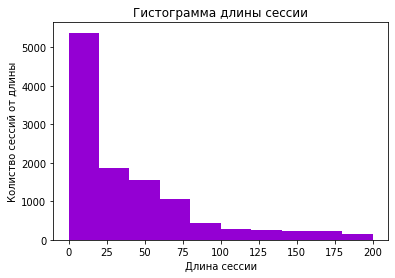

In [23]:
x = train_data_10users['session_timespan']
x_range = (0, 200)
hist_color = 'darkviolet'
plt.hist(x, range=x_range, color=hist_color)
plt.title('Гистограмма длины сессии')
plt.xlabel('Длина сессии')
plt.ylabel('Колиство сессий от длины')
plt.show()

**2. Постройте гистограмму распределения числа уникальных сайтов в сессии (*#unique_sites*). Сделайте гистограмму цвета *aqua*, подпишите оси по-русски.**

(array([ 428., 1249.,  890., 1163., 1735., 2199., 2307., 2045., 1394.,
         651.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

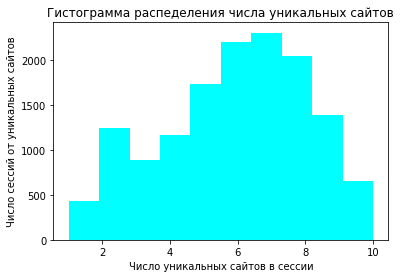

In [24]:
x = train_data_10users['#unique_sites']
x_range = (x.min(), x.max())
hist_color = 'aqua'
plt.title('Гистограмма распеделения числа уникальных сайтов')
plt.xlabel('Число уникальных сайтов в сессии')
plt.ylabel('Число сессий от уникальных сайтов')
plt.hist(x, range=x_range, color=hist_color)

**3. Постройте гистограммы распределения числа уникальных сайтов в сессии (*#unique_sites*) для каждого из 10 пользователей по отдельности. Используйте *subplots*, чтоб разместить все 10 картинок на одной большой. Пометьте легендой каждую картинку, на легенде должно быть написано имя пользователя. Для каждого пользователя раскрасьте гистограмму его/ее цветом (*color_dic*). Подпишите оси по-русски в каждой из 10 гистограмм.**

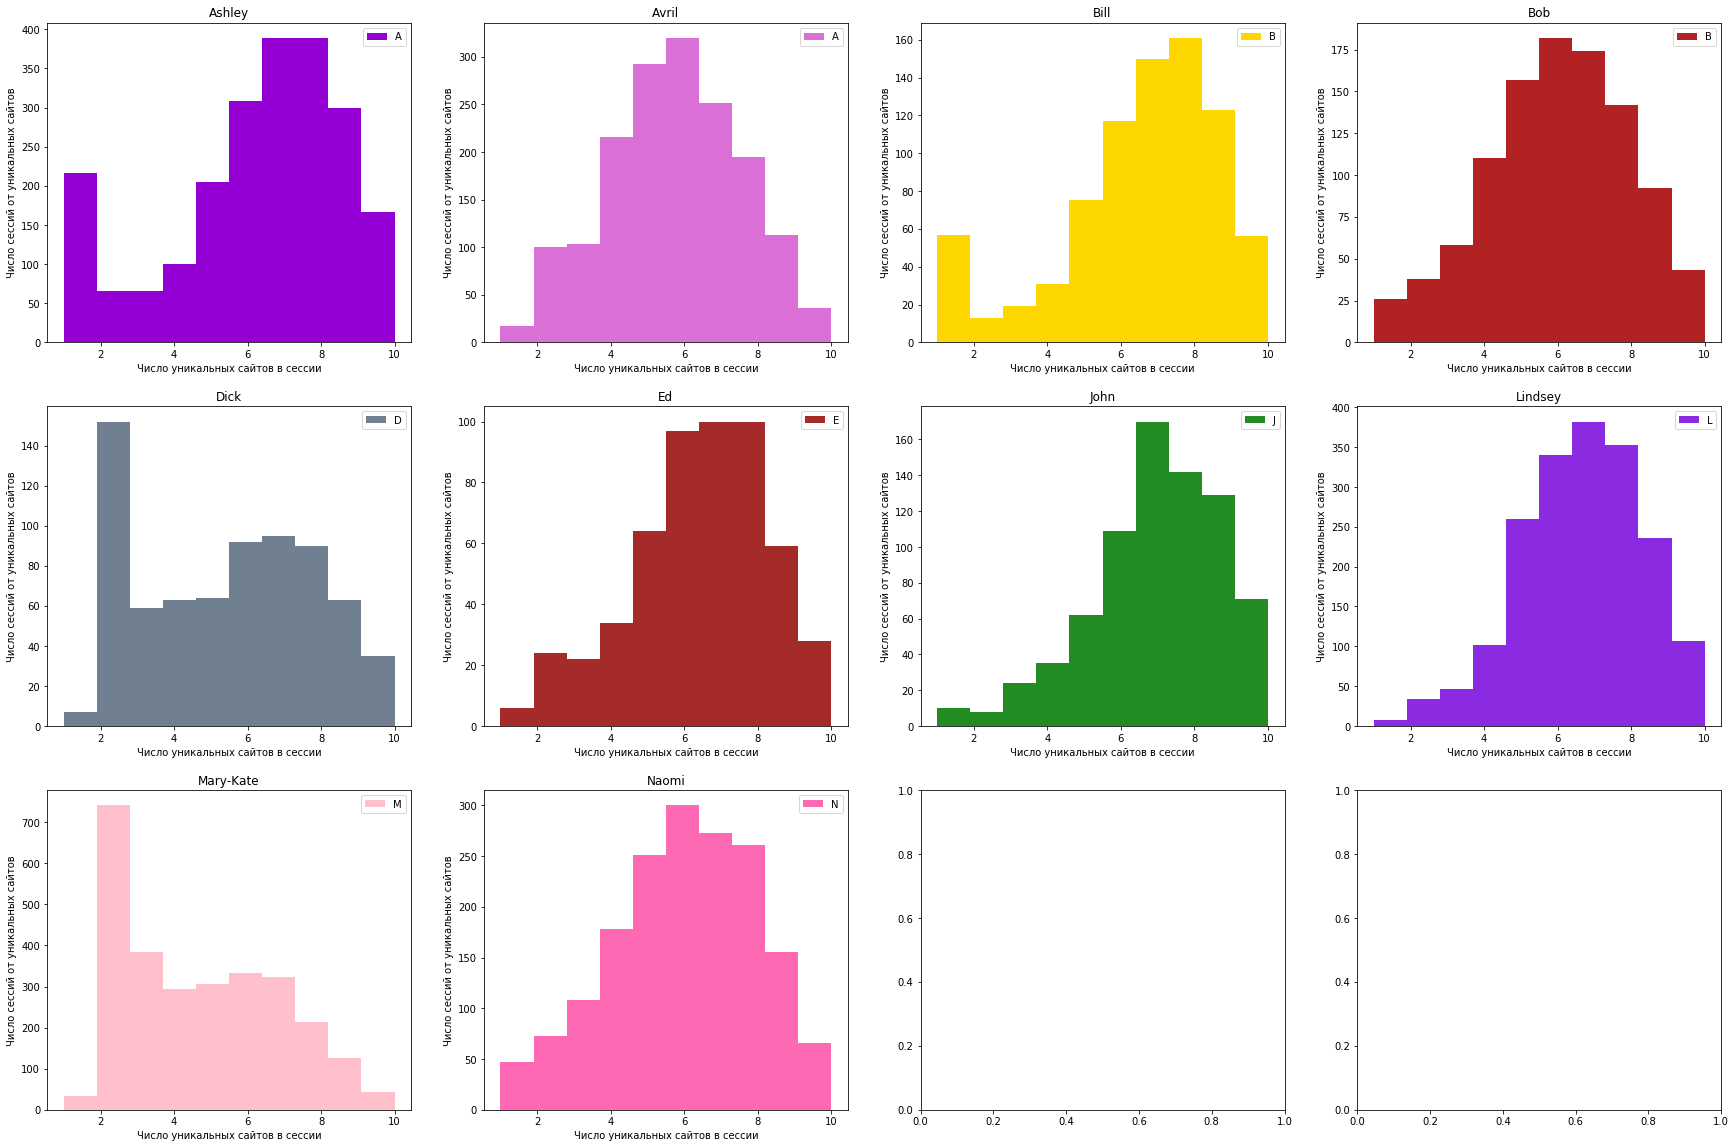

In [25]:
cols_number = 4
rows_number = 3
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(30, 20))
# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(train_data_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['#unique_sites']
    hist_color = color_dic[user]
    axes[i][j].hist(x, color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Число уникальных сайтов в сессии')
    axes[i][j].set_ylabel('Число сессий от уникальных сайтов')
    axes[i][j].legend(user)
    
    
plt.show()

    

**4. Постройте гистограмму распределения часа начала сессии (*start_hour*). Сделайте гистограмму цвета *darkgreen*, подпишите оси по-русски.**

(array([ 775., 2561.,  920., 2443., 1872., 2356., 1379.,  456.,  942.,
         357.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <a list of 10 Patch objects>)

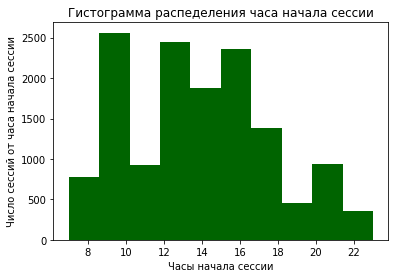

In [26]:
x = train_data_10users['start_hour']
x_range = (x.min(), x.max())
hist_color = 'darkgreen'
plt.title('Гистограмма распеделения часа начала сессии')
plt.xlabel('Часы начала сессии')
plt.ylabel('Число сессий от часа начала сессии')
plt.hist(x, range=x_range, color=hist_color)

**5. Постройте гистограммы распределения часа начала сессии (*start_hour*) для каждого из 10 пользователей по отдельности. Используйте *subplots*, чтоб разместить все 10 картинок на одной большой. Пометьте легендой каждую картинку, на легенде должно быть написано имя пользователя. Для каждого пользователя раскрасьте гистограмму его/ее цветом (*color_dic*). Подпишите оси по-русски в каждой из 10 гистограмм.**

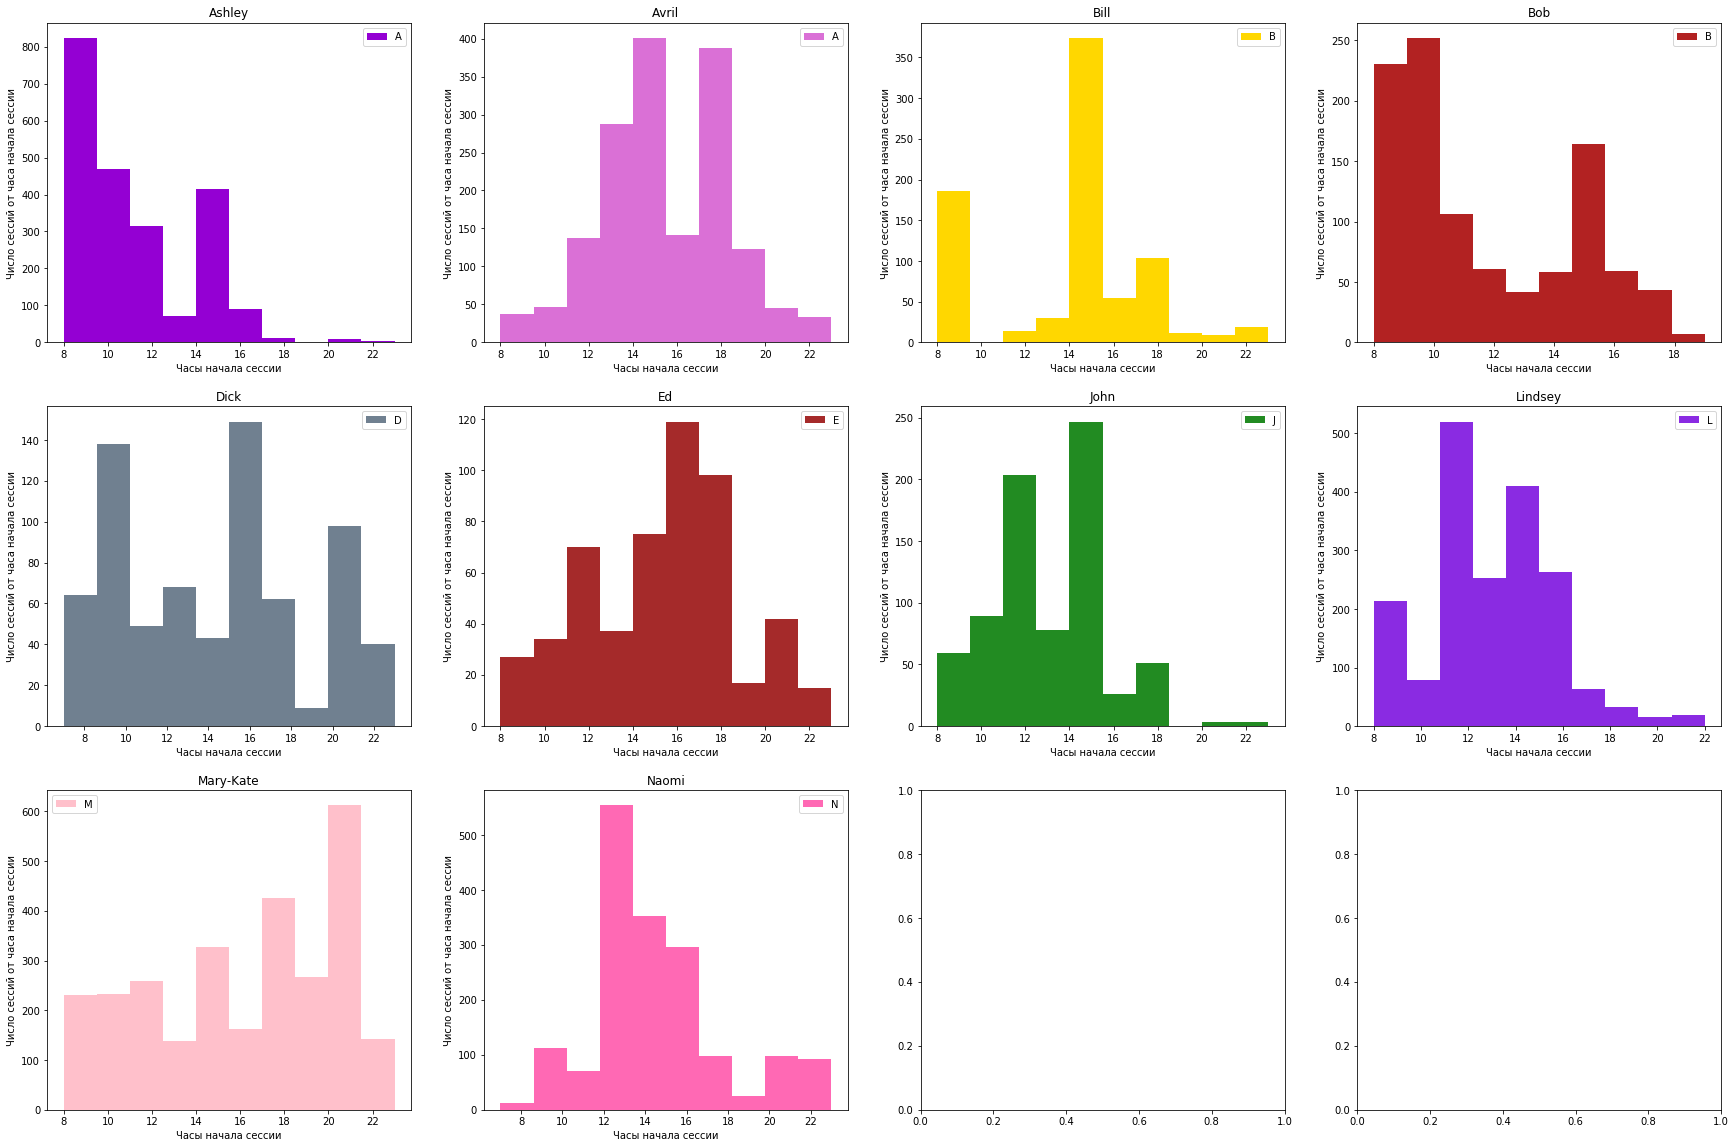

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(train_data_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['start_hour']
    hist_color = color_dic[user]
    axes[i][j].hist(x, color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Часы начала сессии')
    axes[i][j].set_ylabel('Число сессий от часа начала сессии')
    axes[i][j].legend(user)

**6. Постройте гистограмму распределения дня недели, в который началась сессия (*day_of_week*). Сделайте гистограмму цвета *sienna*, подпишите оси по-русски.**

(array([1505., 2772.,    0., 3163.,    0., 2316., 1520.,    0., 1494.,
        1291.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

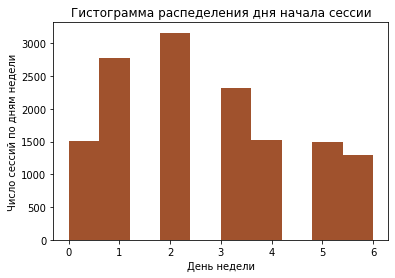

In [28]:
x = train_data_10users['day_of_week']
x_range = (x.min(), x.max())
hist_color = 'sienna'
plt.title('Гистограмма распеделения дня начала сессии')
plt.xlabel('День недели')
plt.ylabel('Число сессий по дням недели')
plt.hist(x, range=x_range, color=hist_color)

**7. Постройте гистограммы распределения дня недели, в который началась сессия (*day_of_week*) для каждого из 10 пользователей по отдельности. Используйте *subplots*, чтоб разместить все 10 картинок на одной большой. Измените метки по оси *X* на ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'] – метод *set_xticklabels*. Пометьте легендой каждую картинку, на легенде должно быть написано имя пользователя. Для каждого пользователя раскрасьте гистограмму его/ее цветом (*color_dic*). Подпишите по-русски название каждой из 10 гистограмм.**

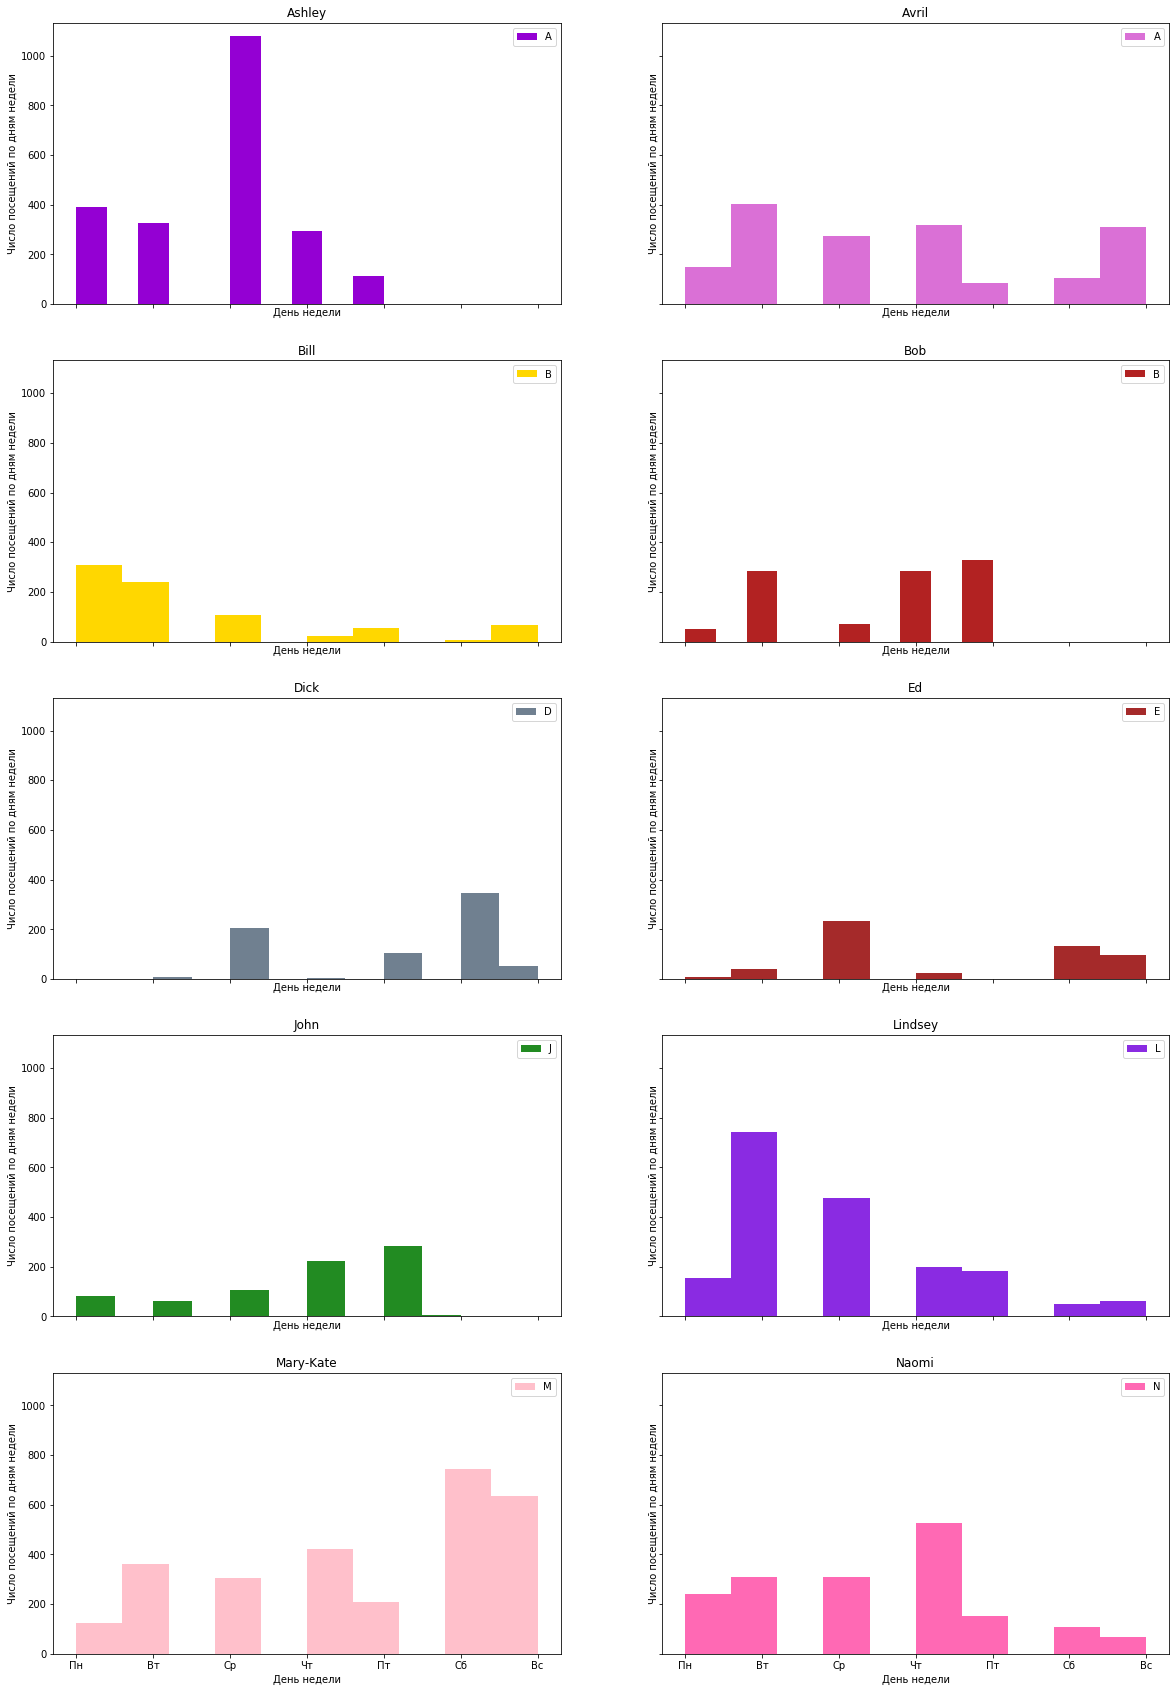

In [29]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30), sharex=True, sharey=True)
x_ticks = ['','Пн','Вт','Ср','Чт','Пт','Сб','Вс']

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(train_data_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['day_of_week']
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('День недели')
    axes[i][j].set_xticklabels(x_ticks)
    axes[i][j].set_ylabel('Число посещений по дням недели')
    axes[i][j].legend(user)
    
    
plt.show()

In [30]:
train_data_10users[:100]

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9,session_timespan,#unique_sites,start_hour,day_of_week,target
0,2,8,5,3,5,5,3,5,9,5,10,0,0,1,20,1,0,1,0,33,5,8,4,John
1,12,11,18,16,5,4,19,4912,17,10,1,0,163,105,0,1,3,3,8,284,10,8,4,John
2,10,3,10,10,7,24,12,25,28,10,0,14,1,242,0,0,1,0,0,258,7,8,4,John
3,29,4911,29,10,10,10,10,34,26,15,2,1,0,1,25,1,0,0,0,30,6,8,4,John
4,30,10,7,4909,35,31,4905,38,39,38,1,0,1,1,1,0,1,1,0,6,9,8,4,John
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,144,144,1,1,1,73,1,73,73,86,1,1,3,3,20,4,1,11,12,56,4,14,4,John
96,144,73,1,144,1,73,73,73,1,73,2,4,4,0,1,6,15,4,11,47,3,14,4,John
97,1,73,73,1,73,73,1,73,1,73,12,2,2,11,13,0,2,4,11,57,2,14,4,John
98,144,73,1,73,1,73,73,70,73,14,10,4,1,3,7,11,1,3,6,46,5,14,4,John


**8. Сделайте выводы про каждого пользователя по построенным графикам.**

## Анализ общих графиков

#### Распределение длительностей сессий

Большие значения для сессий длиной меньше 20 секунд. Это связано, что сессия по сути состоит не из 10 сайтов, а из 1-2ух. Необходимо будет учесть этот эффект в будущем анализе.

#### Распределение числа уникальных сайтов

Видно, 2 пика для числа сайтов 2-3 и 7. Пик для 2-3 сайтов вызван наличием коротких сессий. Для обычных сессий среднее 7-8.

#### Распределение по времени начала сессии

Есть несколько пиков активности. Сначала пользователи приходят на работу и первым делом заходят на сайты. Потом работают. Затем снова в обед заходят на сайты. После того, как приезжают домой с работы снова заходят на сайты.

#### Распределение сессий по дням недели

Выброс во вторник и среду обусловлен пользователями. В целом без этих пользователей гистограмма была бы без явных выбросов. 
    й16к45лпюжн6эъ87шшш

### Анализ графиков по пользователям

#### Ashley
##### Распределение числа уникальных сайтов
Есть сессии с минимальным числом сайтов.
##### Распределение по времени начала сессии
Пользователь заходит в основном ночью или в середине дня.
##### Распределение сессий по дням недели
Наиболее частое посещение сайтов в среду. Возможно, на сайтах в среду идёт обновление информации. 
#### Avril
##### Распределение числа уникальных сайтов
Число сайтов распределено внешне нормально, без явно выраженных выбросов. 
##### Распределение по времени начала сессии
Пользователь заходит днём и вечером.
##### Распределение сессий по дням недели
Ярко выраженных пиков нет. В середине недели число посещений выше. 
#### Bil
##### Распределение числа уникальных сайтов
Есть выброс числа сессий для числа уникальных сайтов 1. 
##### Распределение по времени начала сессии
Пользователь заходит в основном ночью или в середине дня.
##### Распределение сессий по дням недели
Пользователь заходит в основном  
#### Bob
##### Распределение числа уникальных сайтов
Число сайтов распределено внешне нормально, без явно выраженных выбросов. 
##### Распределение по времени начала сессии
Пользователь в основном заходит ночью и после 14 часов. 
##### Распределение сессий по дням недели
Пользователь заходит только в рабочие дни. 
#### Dick
##### Распределение числа уникальных сайтов
Есть большой выброс для значения сайтов 2. В остальном совпдает с другими пользователями.
##### Распределение по времени начала сессии
Пользователь заходит с утра, после обеда и после прихода с работы. 
##### Распределение сессий по дням недели
Пользоатель заходит немного среди недели, особенно в среду. В основном заходит на выходных.
#### Ed
##### Распределение числа уникальных сайтов
Число сайтов распределено внешне нормально, без явно выраженных выбросов. 
##### Распределение пов времени начала сессии
Пользователь в основном заходит после 2-ух дня. Немного заходит с утра и вечером.
##### Распределение сессий по дням недели
Пользователь в основном входит с выходные и немного в среду.
#### John
##### Распределение числа уникальных сайтов
Явно выражено смещение к среднему значению.
##### Распределение по времени начала сессии
Ярко выражены входы до 12 и после 14 до 16
##### Распределение сессий по дням недели
Пользователь входит по будням.
#### Lindsey
##### Распределение числа уникальных сайтов
Явно выражено смещение к среднему значению.
##### Распределение по времени начала сессии
Выбросы ночью, до 12-ти и после обеда до 16-ти
##### Распределение сессий по дням недели
Входит в основном во вторник, в выходные почти не работает.
#### Mary-Kate
##### Распределение числа уникальных сайтов
Ярко выражено значение 2, граничные значение 1 и 10 встречаются редко. 
##### Распределение по времени начала сессии
Видим увеличение посещений от утра к вечеру, в середине дня есть выброс по отношению к другим дневным часам.
##### Распределение сессий по дням недели
В основном входит по выходным.
#### Naomi
##### Распределение числа уникальных сайтов
Смещение к среднему значению.
##### Распределение по времени начала сессии
Входит в основном после обеда, около 14-ти
##### Распределение сессий по дням недели
По будням в основном одинаково, чуть меньше к выходным.

**Загрузите сохраненный ранее в pickle-файл частотный словарь сайтов для 10 пользователей. **

In [31]:
with open(os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'), 'rb') as site_freq:
    site_freqs = pickle.load(site_freq)

**Определите топ-10 самых посещаемых сайтов (*top10_sites*) и соответствующие кол-ва посещений (*top10_freqs*).**

In [32]:
# print(site_freqs.keys())
site_freqs['i1-js-14-3-01-11074-396307207-i.init.cedexis-radar.net']

(1, 4835)

In [33]:
keys = list(site_freqs.keys())
frequences = []
unique_frequences = []
for key in keys:
    freq_tuple = site_freqs[key]
    frequence = freq_tuple[0]
    frequences.append(frequence)
unique_frequences = np.unique(np.array(frequences))
top10_freqs = unique_frequences[-10:]
top10_sites = []
for key in keys:
    freq_tuple = site_freqs[key]
    if freq_tuple[0] in top10_freqs:
        top10_sites.append(key)
print(top10_freqs)
print(top10_sites)
top10_freqs = []
for site in top10_sites:
    freq_tuple = site_freqs[site]
    top10_freq = freq_tuple[0]
    top10_freqs.append(top10_freq)
print(top10_freqs)

[2089 2630 3094 3244 3758 4141 4158 5441 7813 8300]
['www.google.com', 'www.facebook.com', 'www.google.fr', 'apis.google.com', 'mail.google.com', 'accounts.google.com', 'plus.google.com', 's.youtube.com', 'r1---sn-gxo5uxg-jqbe.googlevideo.com', 'r3---sn-gxo5uxg-jqbe.googlevideo.com']
[5441, 4141, 7813, 3758, 4158, 2089, 2630, 8300, 3094, 3244]


**9. Нарисуйте *seaborn barplot*, показывающий частоты посещений топ-10 сайтов. Сделайте подписи сайтов вертикальными, иначе они сливаются (*xticks*).**

                                      0                                 Сайты  \
0                        www.google.com                        www.google.com   
1                      www.facebook.com                      www.facebook.com   
2                         www.google.fr                         www.google.fr   
3                       apis.google.com                       apis.google.com   
4                       mail.google.com                       mail.google.com   
5                   accounts.google.com                   accounts.google.com   
6                       plus.google.com                       plus.google.com   
7                         s.youtube.com                         s.youtube.com   
8  r1---sn-gxo5uxg-jqbe.googlevideo.com  r1---sn-gxo5uxg-jqbe.googlevideo.com   
9  r3---sn-gxo5uxg-jqbe.googlevideo.com  r3---sn-gxo5uxg-jqbe.googlevideo.com   

   Частота посещений сайтов  
0                      5441  
1                      4141  
2                 

[Text(0, 0, 'www.google.com'),
 Text(0, 0, 'www.facebook.com'),
 Text(0, 0, 'www.google.fr'),
 Text(0, 0, 'apis.google.com'),
 Text(0, 0, 'mail.google.com'),
 Text(0, 0, 'accounts.google.com'),
 Text(0, 0, 'plus.google.com'),
 Text(0, 0, 's.youtube.com'),
 Text(0, 0, 'r1---sn-gxo5uxg-jqbe.googlevideo.com'),
 Text(0, 0, 'r3---sn-gxo5uxg-jqbe.googlevideo.com')]

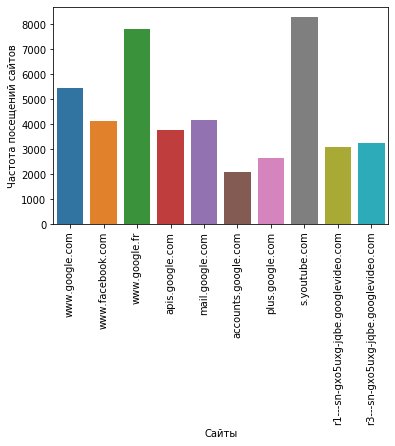

In [36]:
top10_sites_df['Сайты'] = pd.DataFrame(top10_sites)
top10_sites_df['Частота посещений сайтов'] = pd.DataFrame(top10_freqs)
print(top10_sites_df)
axes = sns.barplot(x = "Сайты", y = "Частота посещений сайтов", data=top10_sites_df)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

## Часть 3. Дальнейшее построение признаков

Это задание творческое, тут надо придумать, как еще учесть время посещения веб-страниц и прочие признаки. 

На следующей неделе мы будем использовать "мешок" сайтов  для классификации сессий по принадлежности разным пользователям, а эти новые признаки, которые Вы сейчас создадите, потом добавим и посмотрим, улучшается ли модель. Поэтому можно их создать в виде отдельных матриц и сохранить их также отдельно.  

В этой части задания Вы можете построить и визуально исследовать самые разные признаки (ничто фантазию не ограничивает):
- год, месяц и день начала сессии
- час начала сессии (с учетом года, месяца и дня)
- время суток
- среднее время пребывания на сайте, посчитать можно, скажем, для топ-30 популярных сайтов
- индикаторы посещения популярных сайтов (скажем, тоже для топ-30 популярных сайтов)
- частота посещения Facebook
- ...

**Напишите функцию для создания новых признаков и примените ее к исходным данным – каталогам с 10 и 150 файлами. Сделайте это только для набора данных, полученного с параметрами *session_length=10* и *window_size=10*. Сериализуйте полученные матрицы с помощью pickle. Функция может возвращать как только новые признаки, так и старые с новыми. При этом сигнатура функции может быть другой – тут уже свобода выбора.**

In [37]:
def get_tima_of_day(time:datetime):
    hour_str = datetime.strftime(time, "%H")
    hour = int(hour_str)
    if hour >=0 and hour<6:
        return 0
    if hour >= 6 and hour<12:
        return 1
    if hour>=12 and hour <18:
        return 2
    if hour>=18 and hour<22:
        return 3
    if hour >= 22 and hour<=24:
        return 4

In [38]:
def get_popular_sites(sites_freqs, sites_number):
    keys = list(sites_freqs.keys())
    frequences = []
    for key in keys:
        freq_tuple = sites_freqs[key]
        frequency = freq_tuple[0]
        frequences.append(frequency)
    unique_frequences = np.unique(frequences)
    top_frequences = unique_frequences[-sites_number:]
    top_keys = []
    for key in keys:
        freq_tuple = sites_freqs[key]
        if freq_tuple[0] in top_frequences:
            top_keys.append(key)
    return top_keys

In [39]:
def feature_engineering(path_to_csv_files, site_freq_path, feature_names, session_length=10, window_size=10, popular_sites_number=10):
    all_files_pathes = glob(path_to_csv_files + "*.csv")
    user_ids = []
    for i in range(len(all_files_pathes)):
        path_to_file = all_files_pathes[i]
        file_name_w_ext = os.path.basename(path_to_file)
        file_name = os.path.splitext(file_name_w_ext)
        user_ids.append(int(file_name[0][4:]))
    site_freq_file = open(site_freq_path, "rb")
    site_freq_users = pickle.load(site_freq_file)
#     print(site_freq_users)
    # Перебираем все файлы из папки
    strings = []
    session_timestamp = 0
    session_datetime = 0
    session_start_year = 0
    session_start_month = 0
    session_start_day = 0
    session_start_hour = 0
    session_time_of_day = 0
    top_sites = get_popular_sites(sites_freqs=site_freq_users, sites_number=popular_sites_number)
    for i in range(len(all_files_pathes)):
        path_to_file = all_files_pathes[i]
        file_data_frame = pd.read_csv(path_to_file)
        timestamp = list(file_data_frame['timestamp'])
        sites = file_data_frame['site']
        site_number_id = 0
        session_timespan = 0
        unique_sites_number = 0
        start_hour = 0
        day_of_week = 0
        target = 0
        full_sessions = []
        user_id = user_ids[i]
        session_sites = []
        while site_number_id < len(file_data_frame['site']):
            string = []
            in_top_site = 0
            delta_sites_number = len(file_data_frame['site']) - site_number_id
            if delta_sites_number > session_length:
                full_session = 1
                session_sites = sites[site_number_id:site_number_id+session_length]
            else:
                session_sites = sites[site_number_id:]
                full_session = 0
            for j in range(len(session_sites)):
                if list(session_sites)[j] in top_sites:
                    in_top_site = 1
                    break
            session_timestamp = timestamp[site_number_id]
            session_datetime = datetime.strptime(session_timestamp, '%Y-%m-%d %H:%M:%S')
            session_start_year = datetime.strftime(session_datetime, "%Y")
            session_start_month = datetime.strftime(session_datetime, "%m")
            session_start_day = datetime.strftime(session_datetime, '%d')
            session_start_hour = datetime.strftime(session_datetime, '%H')
            session_time_of_day = get_tima_of_day(session_datetime)
            string.append(session_start_year)
            string.append(session_start_month)
            string.append(session_start_day)
            string.append(session_start_hour)
            string.append(session_time_of_day)
            string.append(full_session)
            string.append(in_top_site)
            string.append(user_id)
            strings.append(string)
            site_number_id += window_size

    strings_data_frame = pd.DataFrame(data=strings, columns=feature_names)
    return strings_data_frame

In [40]:
path_to_csv_files_in = os.path.join(PATH_TO_DATA, '10users//')
site_freq_path_in = os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl')
feature_names_in = ['session start year', 'session start month', 'session start day', 'session start hour', 'session_time_of_day', 'full_session', 'in top site', 'target']

In [41]:
new_features_10users = feature_engineering(path_to_csv_files = path_to_csv_files_in, site_freq_path = site_freq_path_in, feature_names=feature_names_in, session_length = 10, window_size = 10, popular_sites_number = 5)

In [42]:
new_features_10users.head()

,session start year,session start month,session start day,session start hour,session_time_of_day,full_session,in top site,target
0,2013,11,15,08,1,1,1,31
1,2013,11,15,08,1,1,0,31
2,2013,11,15,08,1,1,1,31
3,2013,11,15,08,1,1,0,31
4,2013,11,15,08,1,1,1,31


In [43]:
path_to_csv_files_in = os.path.join(PATH_TO_DATA, '150users//')
site_freq_path_in = os.path.join(PATH_TO_DATA, 'site_freq_150users.pkl')

In [44]:
new_features_150users = feature_engineering(path_to_csv_files = path_to_csv_files_in, site_freq_path = site_freq_path_in, feature_names=feature_names_in, session_length = 10, window_size = 10, popular_sites_number = 5)

In [45]:
new_features_150users.head()

,session start year,session start month,session start day,session start hour,session_time_of_day,full_session,in top site,target
0,2013,11,15,08,1,1,1,6
1,2013,11,15,08,1,1,1,6
2,2013,11,15,08,1,1,1,6
3,2013,11,15,09,1,1,1,6
4,2013,11,15,09,1,1,1,6


**10. Постройте картинки для новых признаков, поисследуйте их, прокомментируйте результаты.**

(array([ 3630.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10431.]),
 array([2013. , 2013.1, 2013.2, 2013.3, 2013.4, 2013.5, 2013.6, 2013.7,
        2013.8, 2013.9, 2014. ]),
 <a list of 10 Patch objects>)

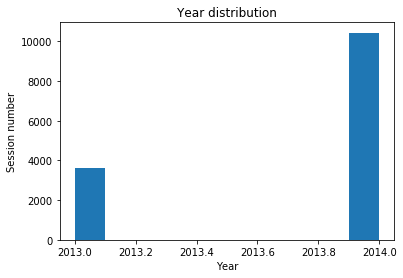

In [89]:
session_start_year_10users = new_features_10users['session start year'].astype('int')
plt.title('Year distribution')
plt.xlabel('Year')
plt.ylabel('Session number')
plt.hist(session_start_year_10users)

(array([39110.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 97909.]),
 array([2013. , 2013.1, 2013.2, 2013.3, 2013.4, 2013.5, 2013.6, 2013.7,
        2013.8, 2013.9, 2014. ]),
 <a list of 10 Patch objects>)

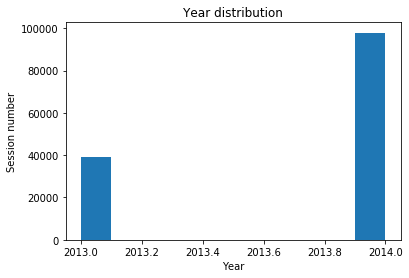

In [90]:
session_start_year_150users = new_features_150users['session start year'].astype('int')
plt.title('Year distribution')
plt.xlabel('Year')
plt.ylabel('Session number')
plt.hist(session_start_year_150users)

(array([5481., 2379., 2478.,   93.,    0.,    0.,    0.,    0.,    0.,
        3630.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

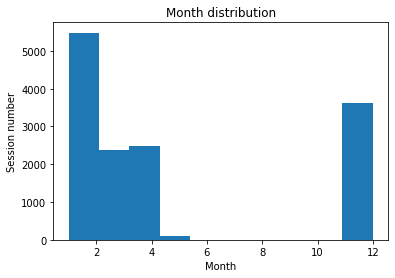

In [91]:
session_start_month_10users = new_features_10users['session start month'].astype('int')
plt.title('Month distribution')
plt.xlabel('Month')
plt.ylabel('Session number')
plt.hist(session_start_month_10users)

(array([48281., 22086., 20621.,  6921.,     0.,     0.,     0.,     0.,
            0., 39110.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

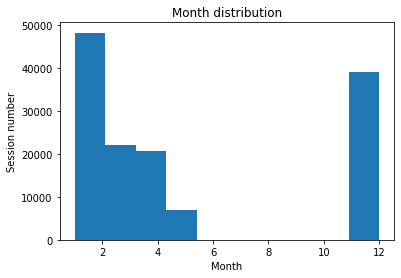

In [92]:
session_start_month_150users = new_features_150users['session start month'].astype('int')
plt.title('Month distribution')
plt.xlabel('Month')
plt.ylabel('Session number')
plt.hist(session_start_month_150users)

(array([ 641., 2640., 1233., 1500., 1202., 1093., 2215., 1420., 1452.,
         665.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

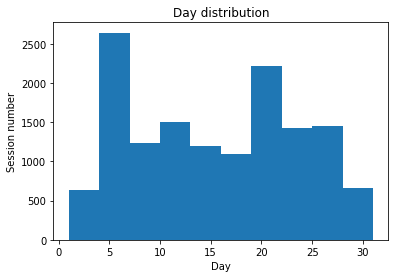

In [93]:
session_start_day_10users = new_features_10users['session start day'].astype(int)
plt.title('Day distribution')
plt.xlabel('Day')
plt.ylabel('Session number')
plt.hist(session_start_day_10users)

(array([10772., 15153.,  9357., 13156., 10855., 14381., 23063., 11351.,
        18241., 10690.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

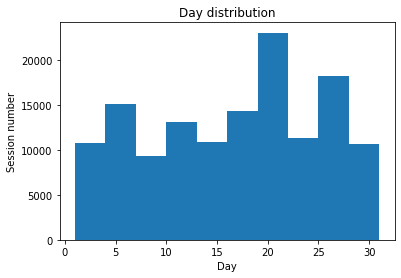

In [94]:
session_start_day_150users = new_features_150users['session start day'].astype('int')
plt.title('Day distribution')
plt.xlabel('Day')
plt.ylabel('Session number')
plt.hist(session_start_day_150users)

(array([ 775., 2561.,  920., 2443., 1872., 2356., 1379.,  456.,  942.,
         357.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <a list of 10 Patch objects>)

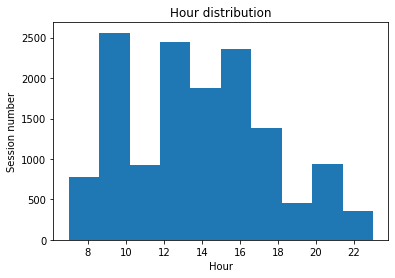

In [95]:
session_start_hour_10users = new_features_10users['session start hour'].astype('int')
plt.title('Hour distribution')
plt.xlabel('Hour')
plt.ylabel('Session number')
plt.hist(session_start_hour_10users)

(array([11396., 29476., 13228., 23997., 14945., 25380., 13122.,  1278.,
         2384.,  1813.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <a list of 10 Patch objects>)

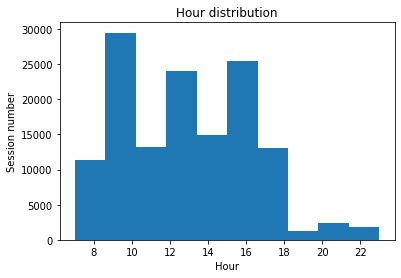

In [96]:
session_start_hour_150users = new_features_150users['session start hour'].astype('int')
plt.title('Hour distribution')
plt.xlabel('Hour')
plt.ylabel('Session number')
plt.hist(session_start_hour_150users)

(array([4256.,    0.,    0., 7550.,    0.,    0., 1898.,    0.,    0.,
         357.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

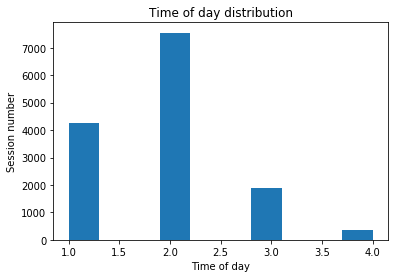

In [97]:
session_time_of_day_10users = new_features_10users['session_time_of_day'].astype('int')
plt.title('Time of day distribution')
plt.xlabel('Time of day')
plt.ylabel('Session number')
plt.hist(session_time_of_day_10users)

(array([54100.,     0.,     0., 74428.,     0.,     0.,  6678.,     0.,
            0.,  1813.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

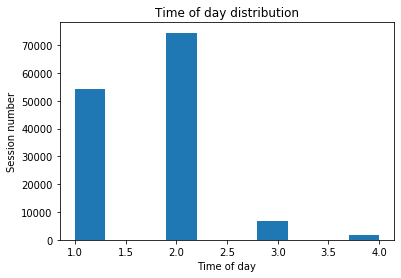

In [98]:
session_time_of_day_150users = new_features_150users['session_time_of_day'].astype('int')
plt.title('Time of day distribution')
plt.xlabel('Time of day')
plt.ylabel('Session number')
plt.hist(session_time_of_day_150users)

(array([1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4051e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

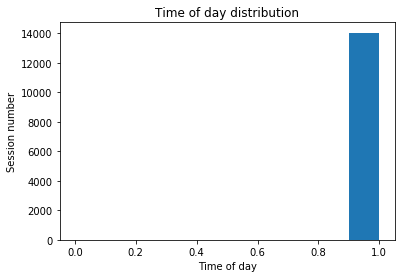

In [99]:
session_full_10users = new_features_10users['full_session'].astype('int')
plt.title('Time of day distribution')
plt.xlabel('Time of day')
plt.ylabel('Session number')
plt.hist(session_full_10users)

(array([   150.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 136869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

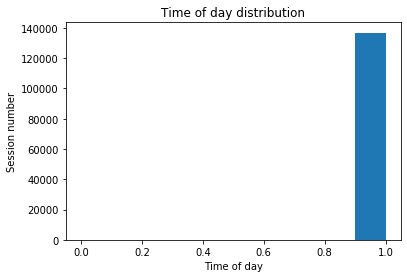

In [100]:
session_full_150users = new_features_150users['full_session'].astype('int')
plt.title('Time of day distribution')
plt.xlabel('Time of day')
plt.ylabel('Session number')
plt.hist(session_full_150users)

(array([ 3809.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

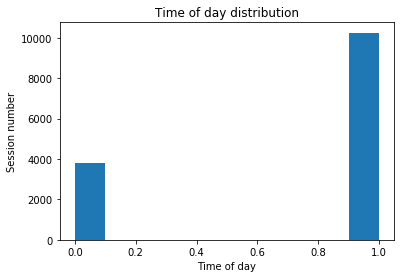

In [101]:
session_in_top_10users = new_features_10users['in top site'].astype('int')
plt.title('Time of day distribution')
plt.xlabel('Time of day')
plt.ylabel('Session number')
plt.hist(session_in_top_10users)

(array([50858.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 86161.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

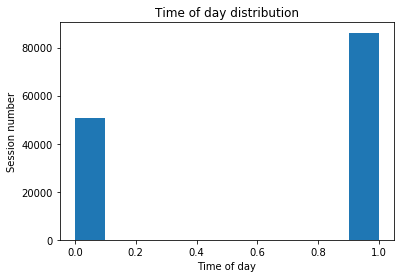

In [102]:
session_in_top_150users = new_features_150users['in top site'].astype('int')
plt.title('Time of day distribution')
plt.xlabel('Time of day')
plt.ylabel('Session number')
plt.hist(session_in_top_150users)

In [71]:
id_name_dict = {128: 'Mary-Kate', 39: 'Ashley', 207: 'Lindsey', 127: 'Naomi', 237: 'Avril',
               33: 'Bob', 50: 'Bill', 31: 'John', 100: 'Dick', 241: 'Ed'}
new_features_10users['target'] = new_features_10users['target'].map(id_name_dict)

In [72]:
color_dic = {'Mary-Kate': 'pink', 'Ashley': 'darkviolet', 'Lindsey':'blueviolet', 
             'Naomi': 'hotpink', 'Avril': 'orchid', 
             'Bob': 'firebrick', 'Bill': 'gold', 'John': 'forestgreen', 
             'Dick': 'slategrey', 'Ed':'brown'}

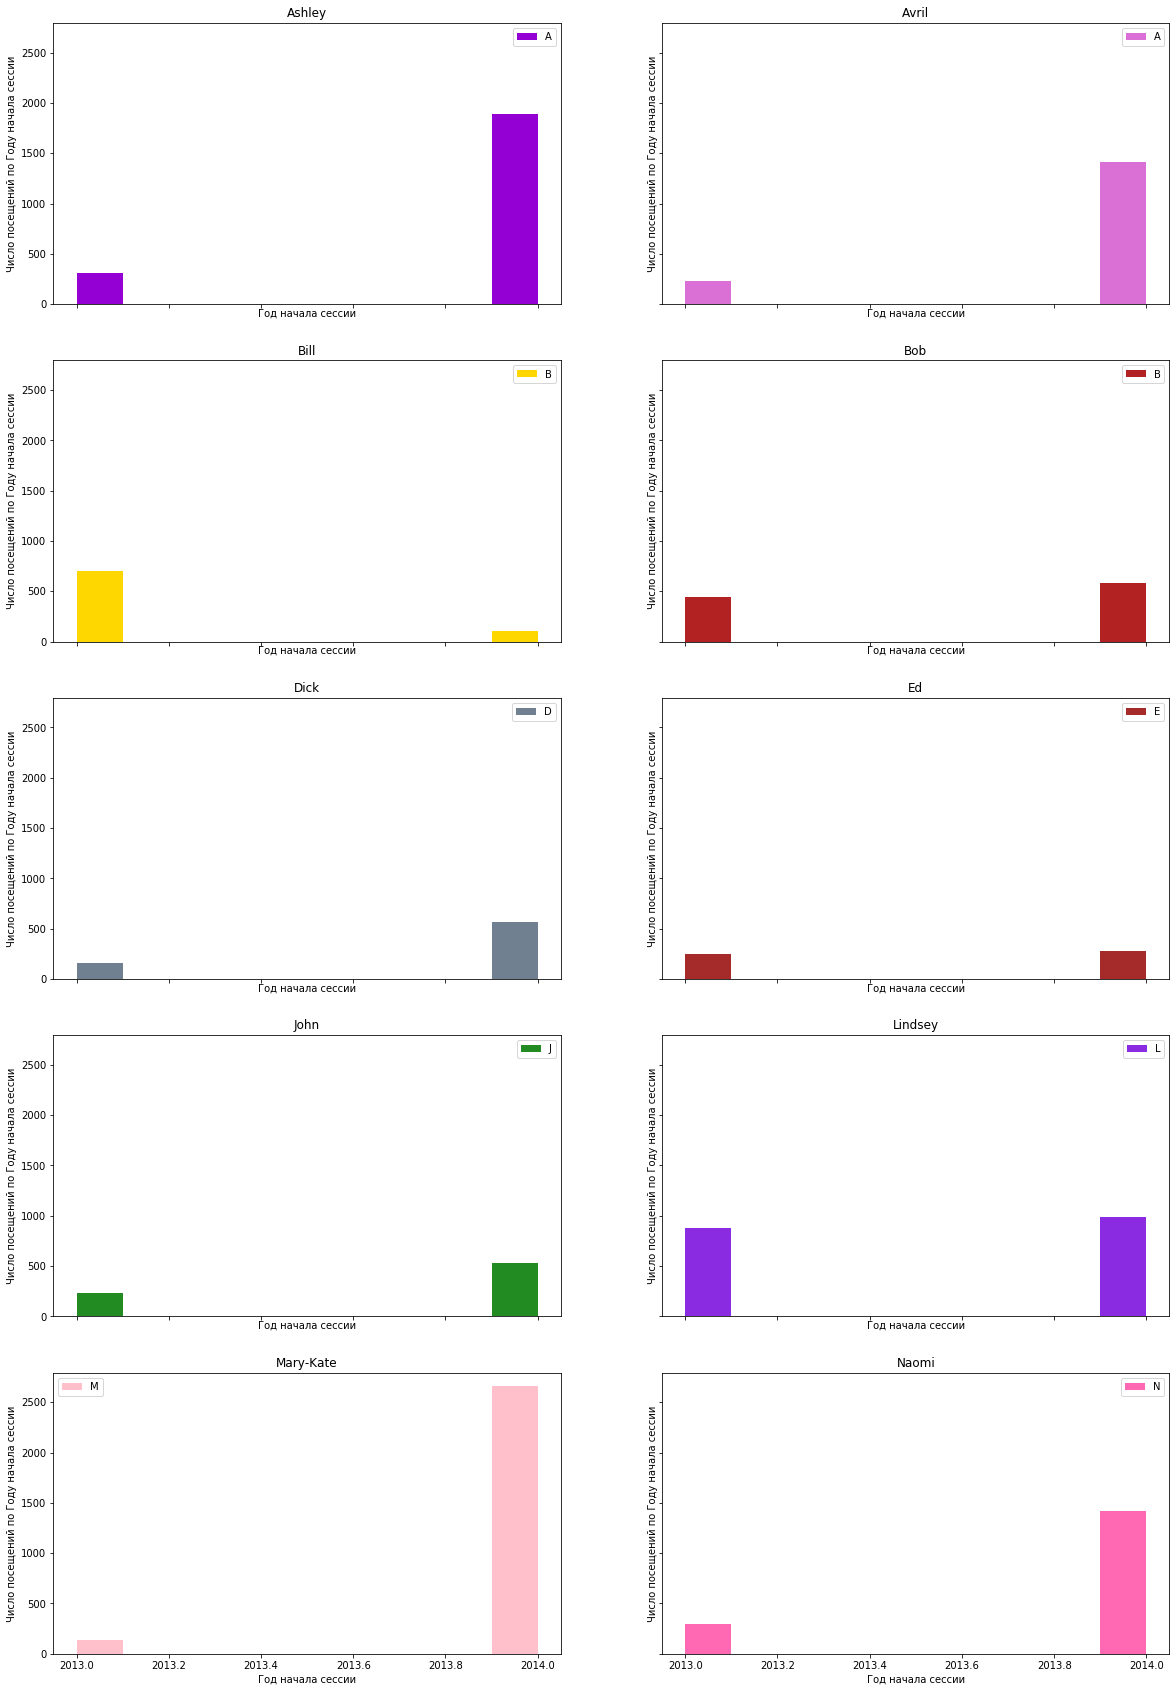

In [109]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30), sharex=True, sharey=True)

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['session start year'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Год начала сессии')
    axes[i][j].set_ylabel('Число посещений по Году начала сессии')
    axes[i][j].legend(user)
    
    
plt.show()

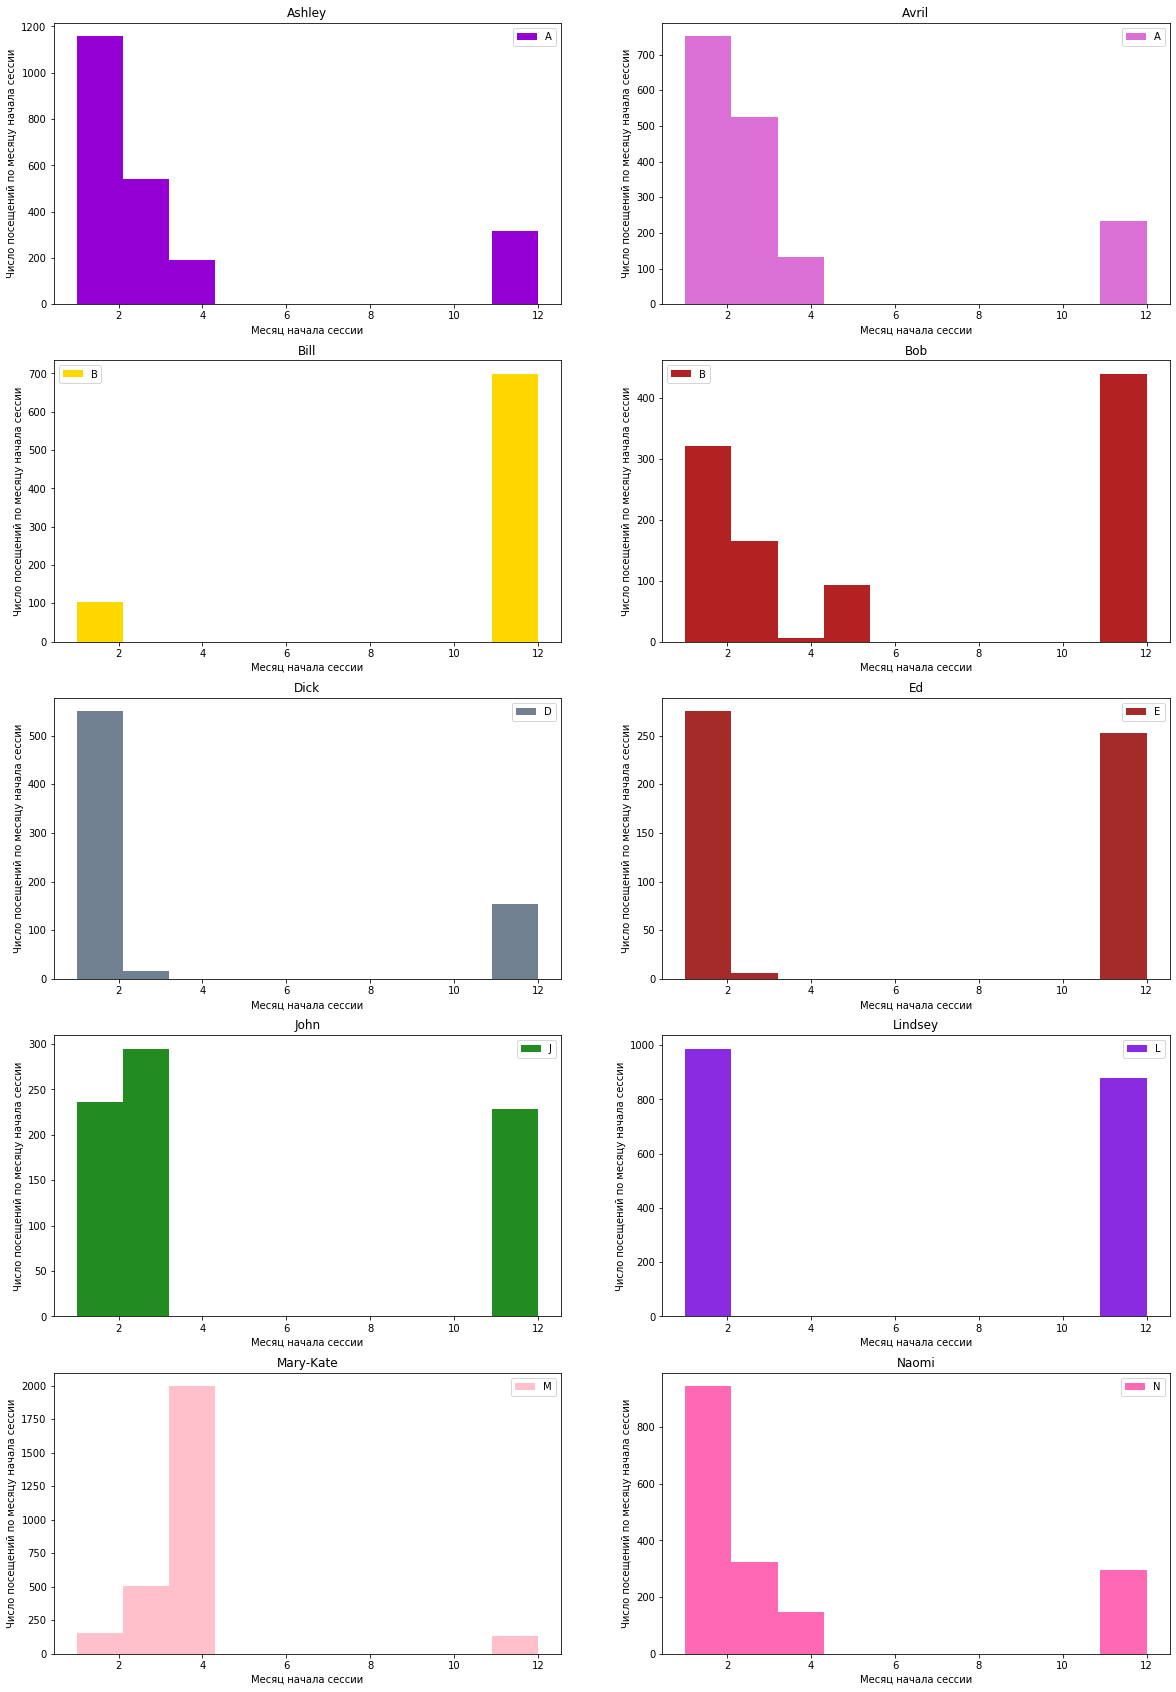

In [110]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['session start month'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Месяц начала сессии')
    axes[i][j].set_ylabel('Число посещений по месяцу начала сессии')
    axes[i][j].legend(user)
    
    
plt.show()

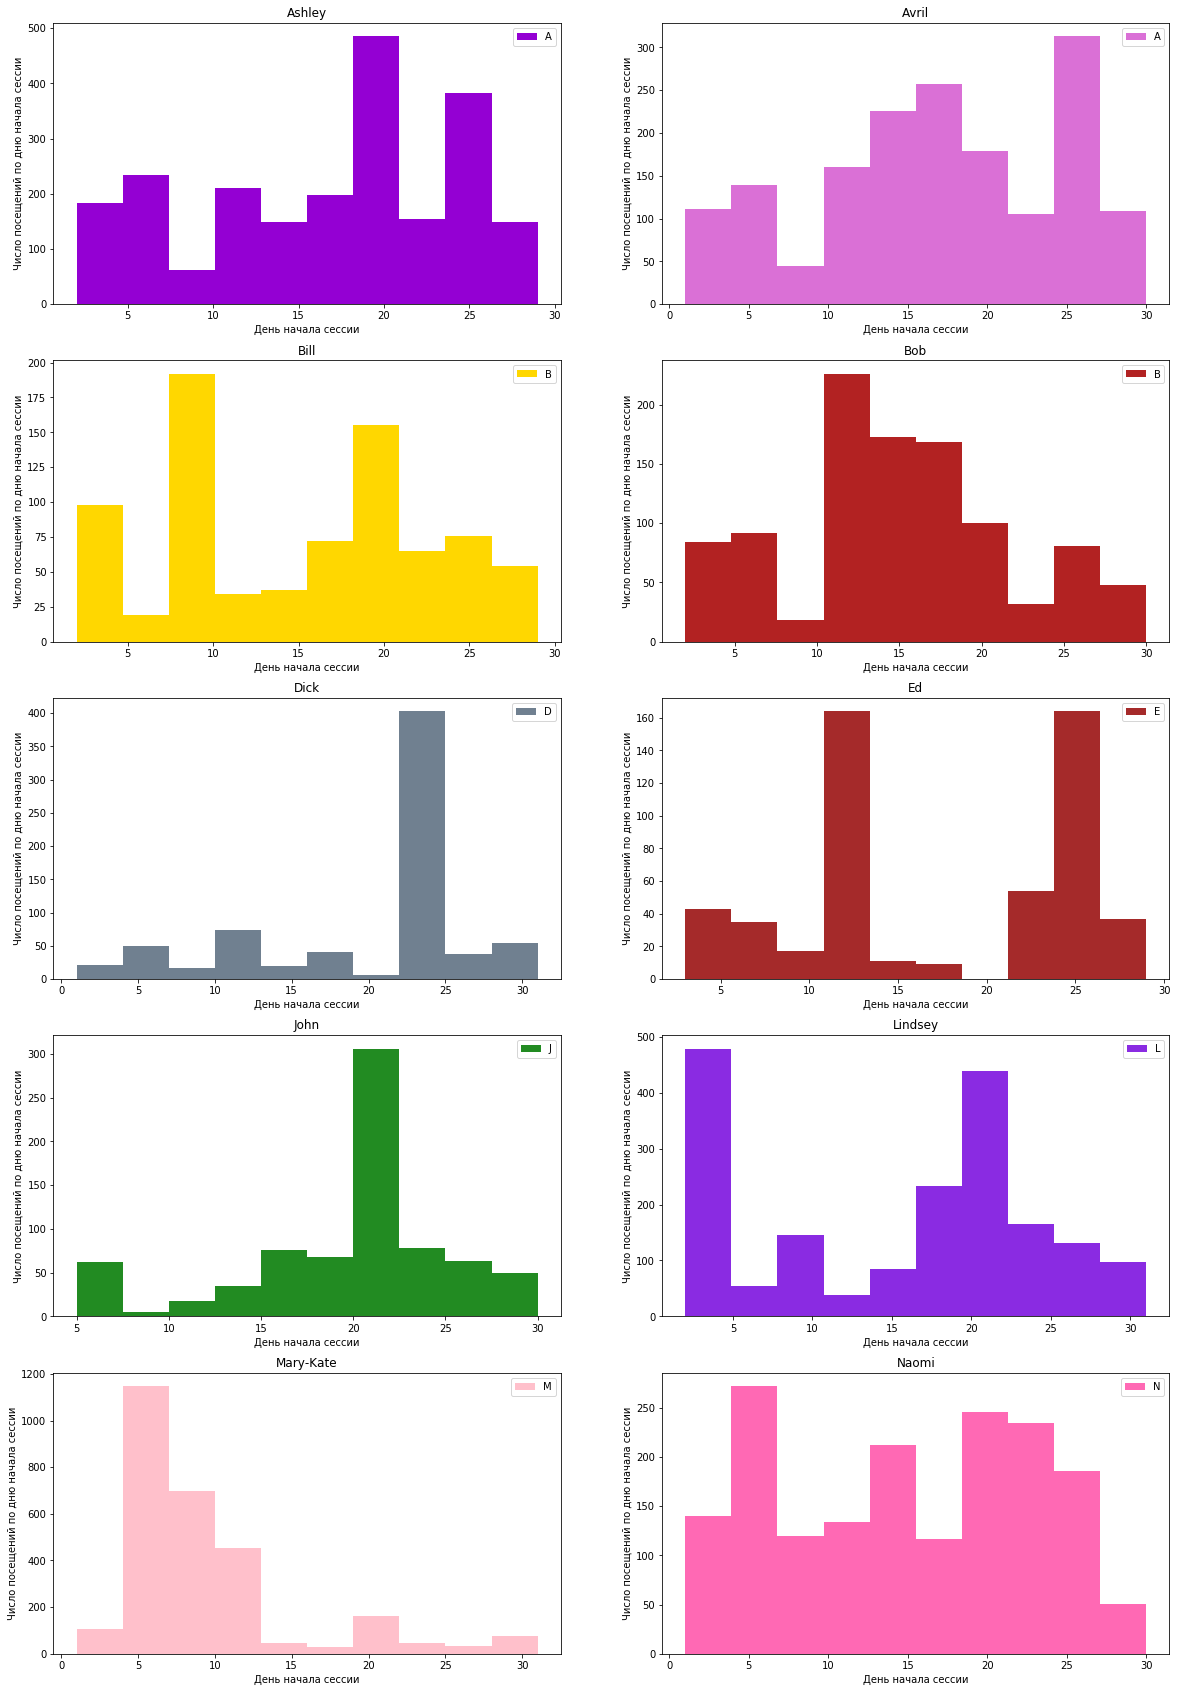

In [120]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['session start day'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('День начала сессии')
    axes[i][j].set_ylabel('Число посещений по дню начала сессии')
    axes[i][j].legend(user)
    
    
plt.show()

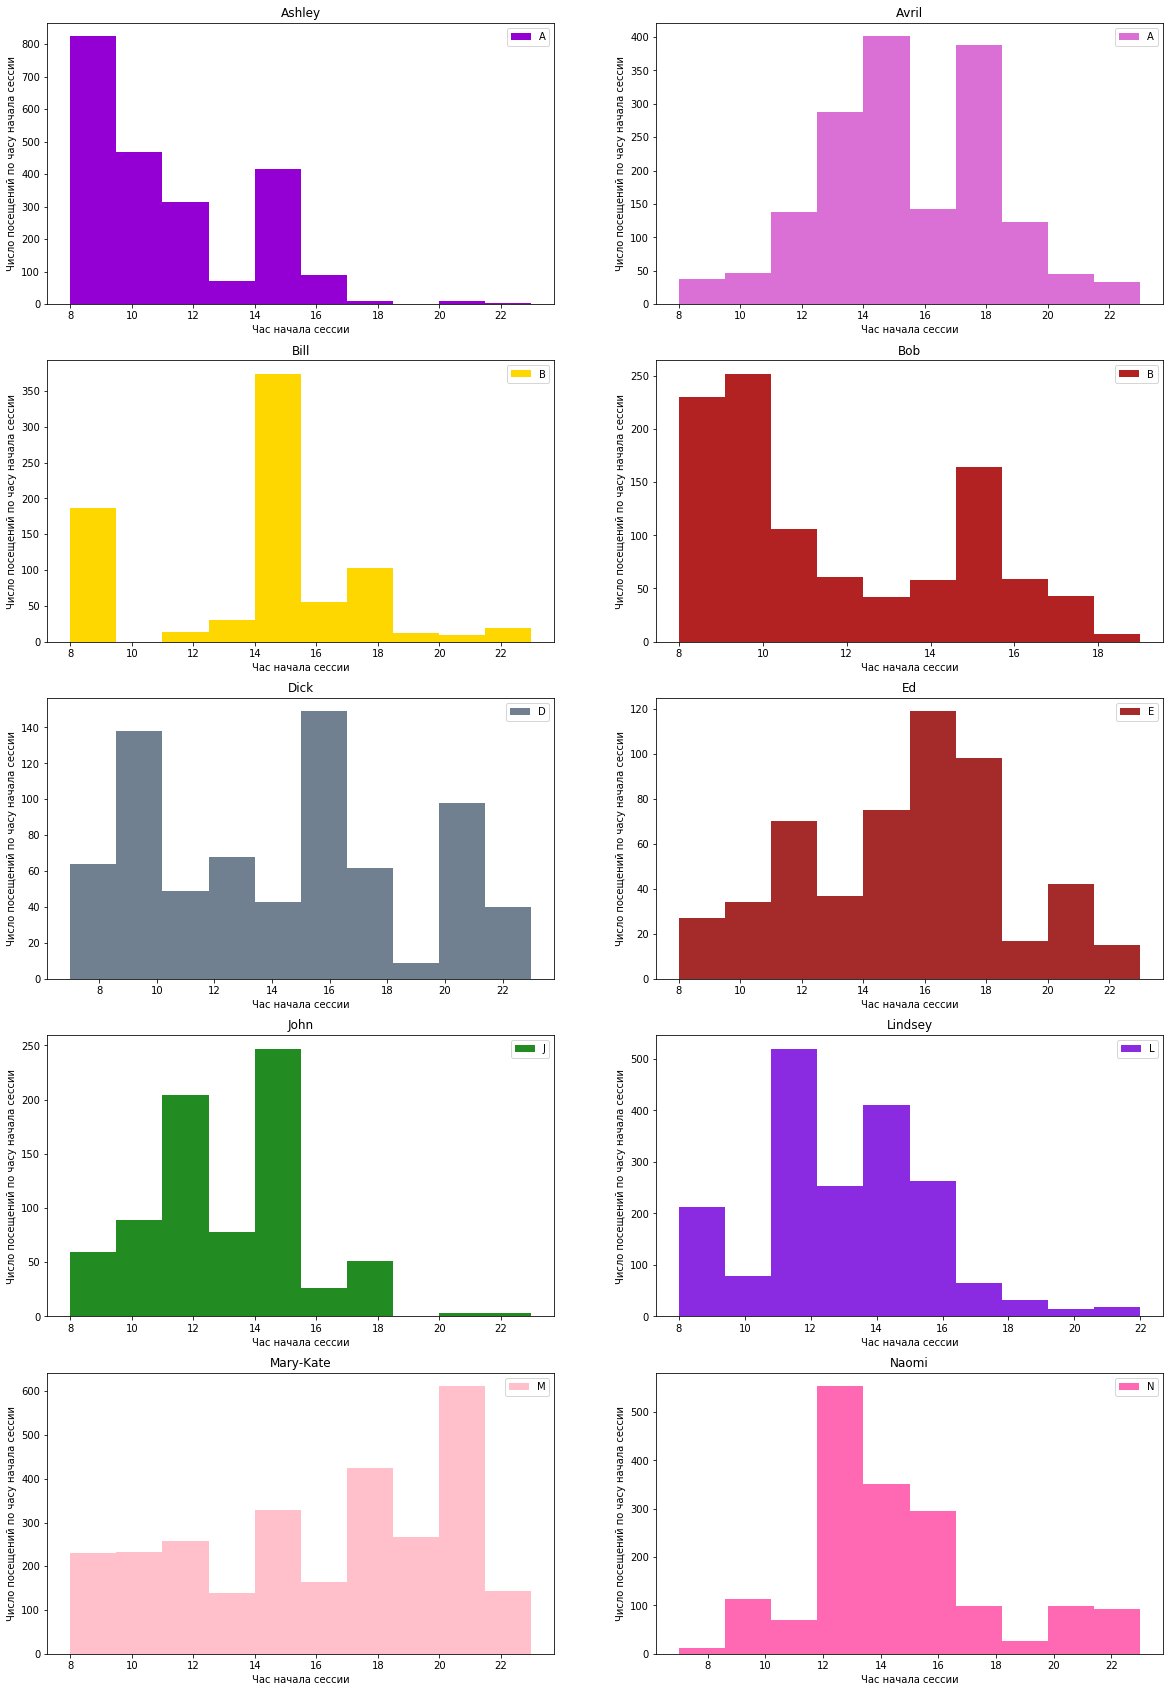

In [121]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['session start hour'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Час начала сессии')
    axes[i][j].set_ylabel('Число посещений по часу начала сессии')
    axes[i][j].legend(user)
    
    
plt.show()

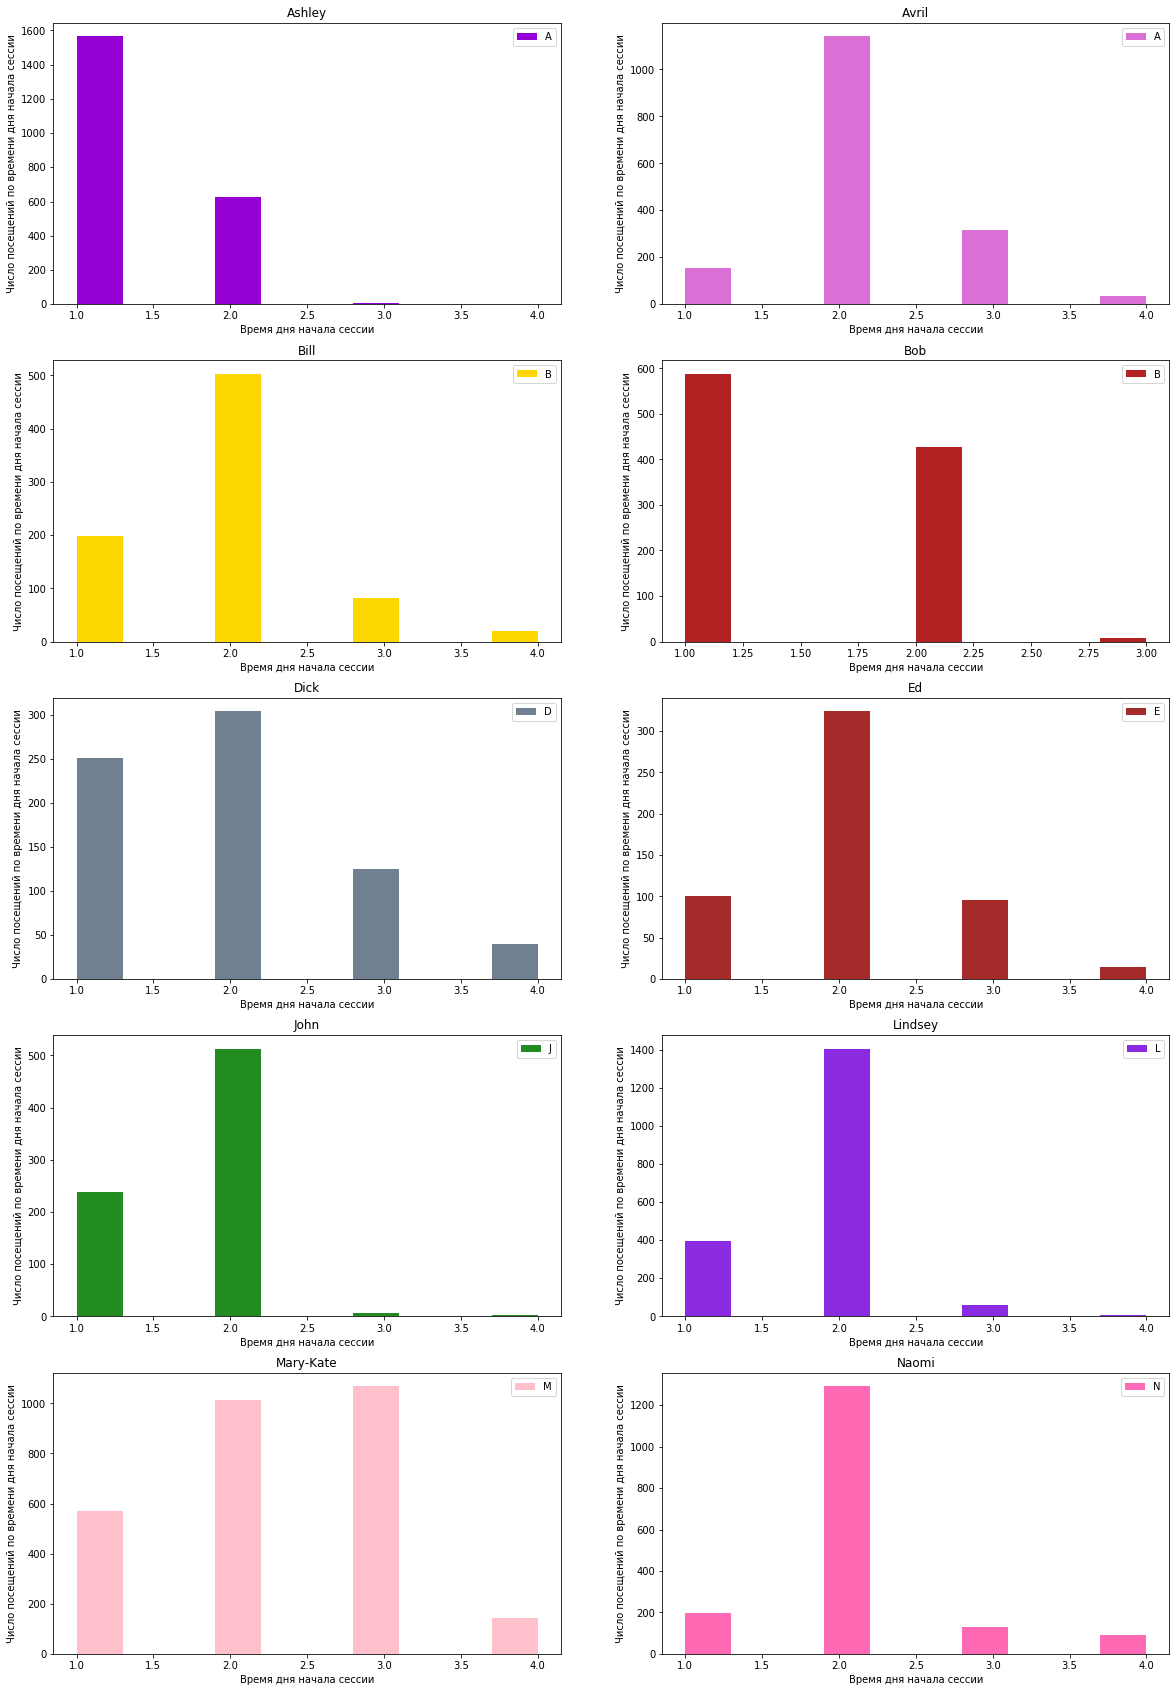

In [122]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['session_time_of_day'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Время дня начала сессии')
    axes[i][j].set_ylabel('Число посещений по времени дня начала сессии')
    axes[i][j].legend(user)
    
    
plt.show()

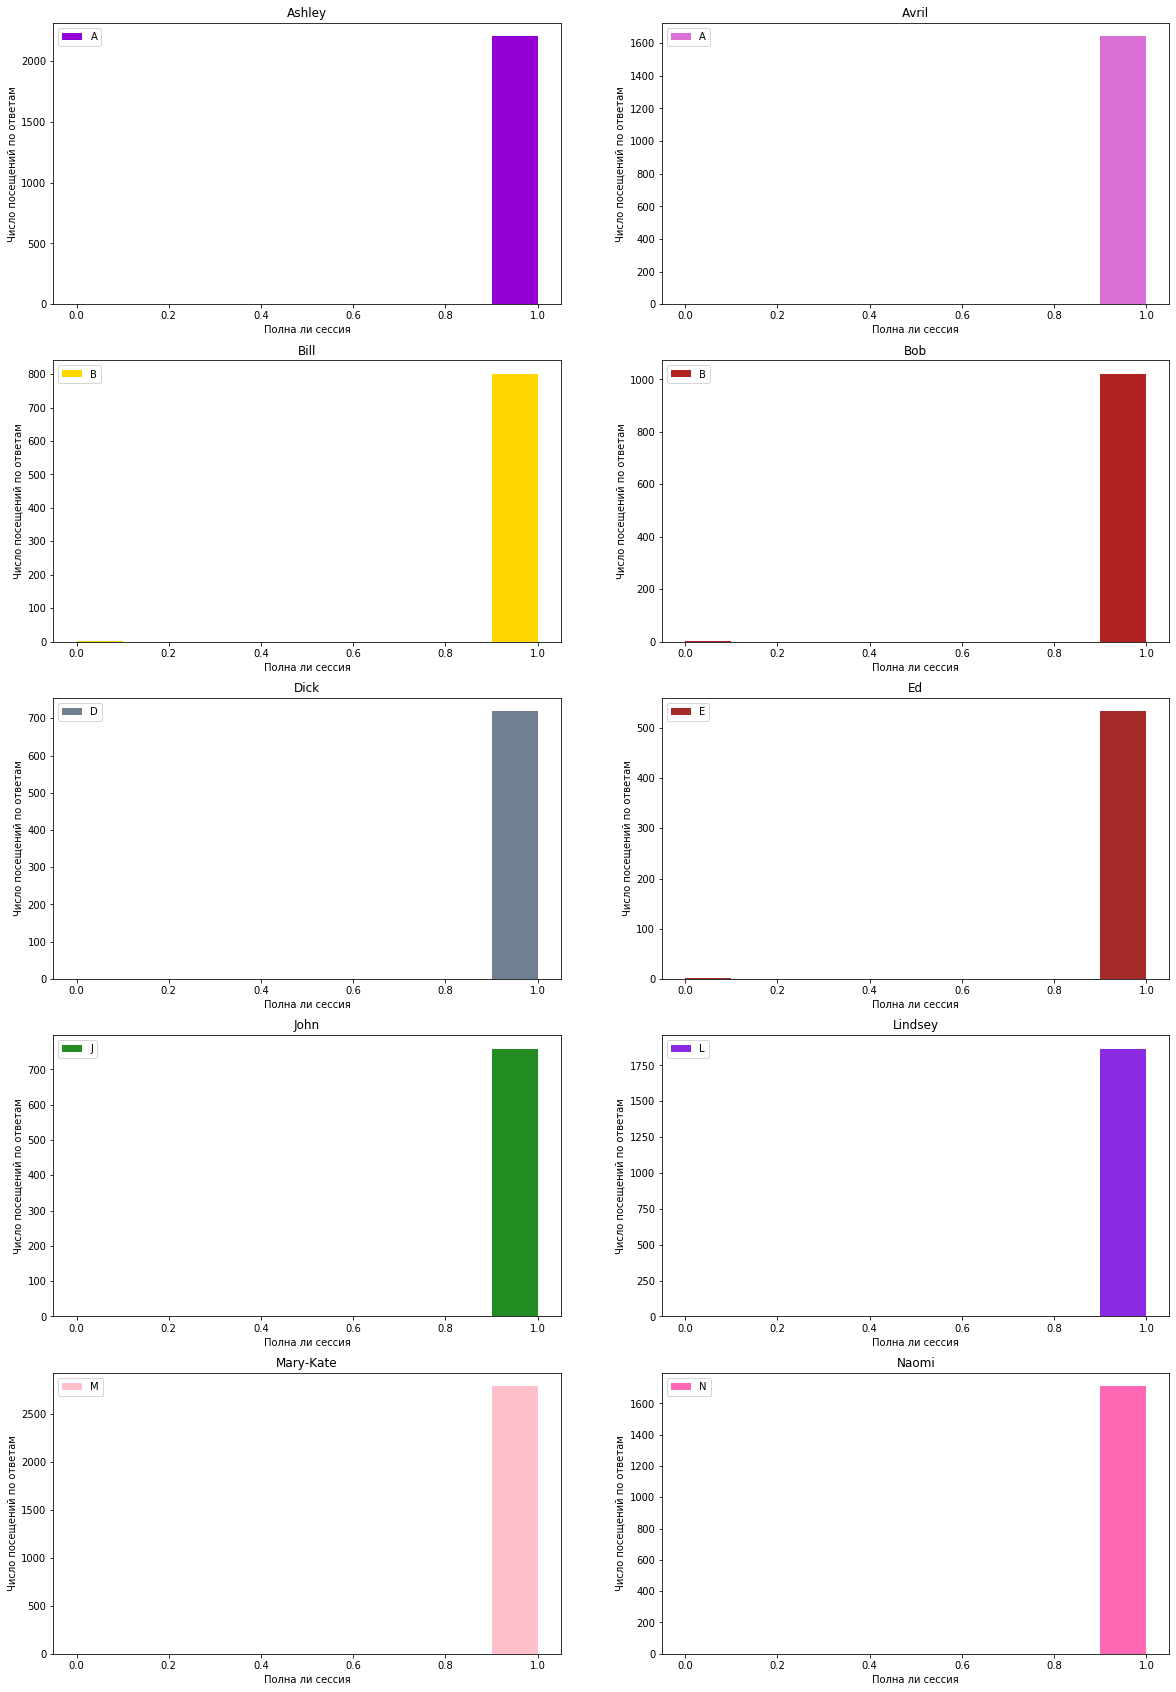

In [116]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['full_session'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Полна ли сессия')
    axes[i][j].set_ylabel('Число посещений по ответам')
    axes[i][j].legend(user)
    
    
plt.show()

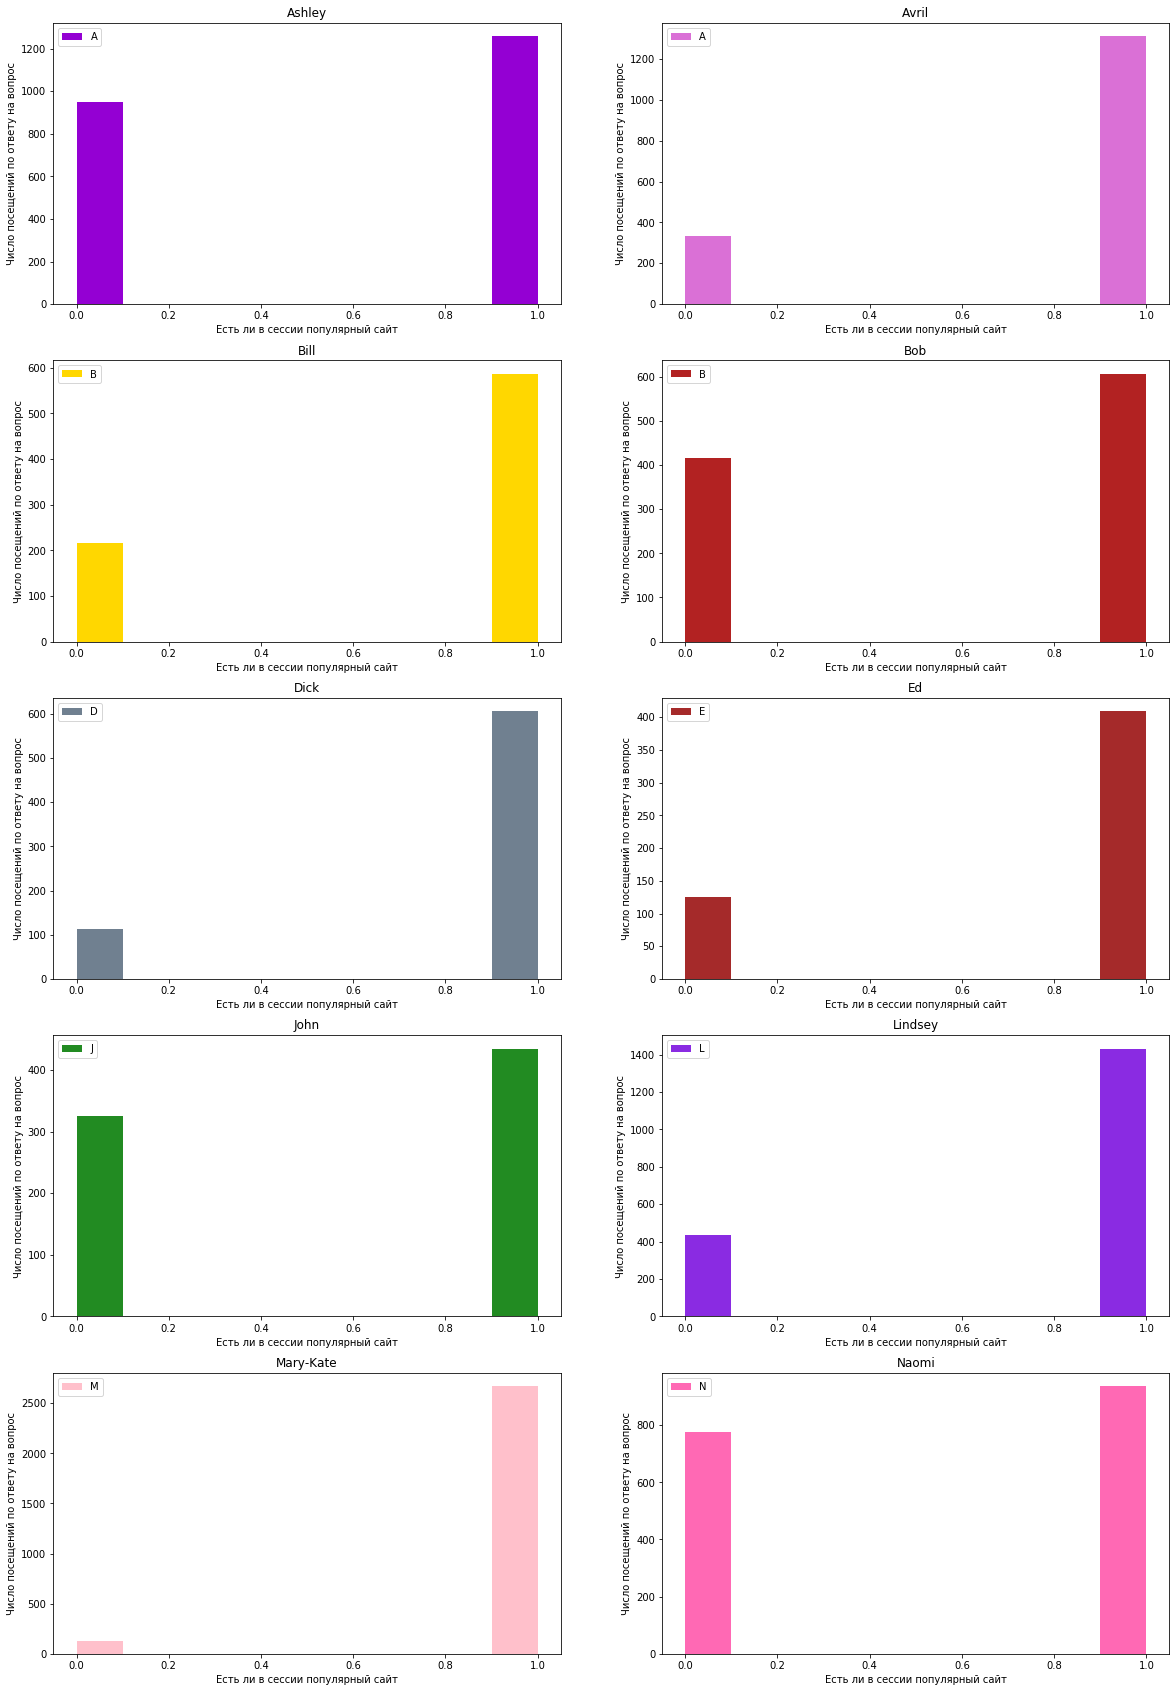

In [118]:
cols_number = 2
rows_number = 5
i = 0
j = 0
fig, axes = plt.subplots(nrows=rows_number, ncols=cols_number, figsize=(20, 30))

# как вариант, можно и по-другому
for idx, (user, sub_df) in  enumerate(df.groupby(new_features_10users, 'target')): 
    i = idx // cols_number
    j = idx % cols_number
    x = sub_df['in top site'].astype('int')
    x_range = (x.min(), x.max())
    hist_color = color_dic[user]
    axes[i][j].hist(x, range=x_range,color=hist_color)
    axes[i][j].set_title(user)
    axes[i][j].set_xlabel('Есть ли в сессии популярный сайт')
    axes[i][j].set_ylabel('Число посещений по ответу на вопрос')
    axes[i][j].legend(user)
    
    
plt.show()

**В конце сохраните в pickle-файлы только те признаки, которые, как Вы предполагаете, помогут идентифицировать пользователя более точно. Это касается и признаков, которые мы вместе создали в начале (*session_timespan, #unique_sites, start_hour, day_of_week*), и Ваших собственных. Можно создать все эти признаки не только для сессий из 10 сайтов, но и для других сочетаний параметров *session_length* и *window_size*.**

In [123]:
selected_features_10users = new_features_10users[['session start year', 'session start month', 'session start day', 'session start hour', 'session_time_of_day', 'in top site', 'target']]
selected_features_150users = new_features_150users[['session start year', 'session start month', 'session start day', 'session start hour', 'session_time_of_day', 'in top site', 'target']]

In [124]:
with open(os.path.join(PATH_TO_DATA, 
                       'selected_features_10users.pkl'), 'wb') as selected_features_10users_pkl:
    pickle.dump(selected_features_10users, selected_features_10users_pkl, 
                protocol=2)
with open(os.path.join(PATH_TO_DATA, 
                       'selected_features_150users.pkl'), 'wb') as selected_features_150users_pkl:
    pickle.dump(selected_features_150users, selected_features_150users_pkl, 
                protocol=2)

### Критерии оценки работы (только для Peer Review в специализации):
- Верно ли отображена гистограмма session_timespan из п. 1? (max. 3 балла)
- Верно ли отображена гистограмма #unique_sites из п. 2? (max. 3 балла)
- Верно ли отображены гистограммы #unique_sites по каждому пользователю из п. 3? (max. 6 баллов)
- Верно ли отображена гистограмма start_hour из п. 4? (max. 3 балла)
- Верно ли отображены гистограммы start_hour по каждому пользователю из п. 5? (max. 6 баллов)
- Верно ли отображена гистограмма day_of_week из п. 6? (max. 3 балла)
- Верно ли отображены гистограммы day_of_week по каждому пользователю из п. 7? (max. 6 баллов)
- Насколько сделанные выводы в п. 8 соответствуют построенным картинкам? (max. 6 баллов)
- Верно ли отображен barplot для 10 популярных сайтов из п. 9? (max. 6 баллов)
- Правильно ли посчитана медианная продолжительность сессий в п. 10? (max. 3 балла)
- Правильно ли посчитан медианный день недели начала сессии в п. 11? (max. 3 балла)
- Правильно ли посчитан медианный час начала сессии в п. 12? (max. 3 балла)
- Правильно ли посчитано медианное значение числа уникальных сайтов в сессиях 150 пользователей п. 13? (max. 3 балла)
- Есть ли оригинальные построенные признаки и картинки к ним? Оцените также и качество картинок. (max. 8 баллов)

## Пути улучшения
Что еще можно добавить по 3 части проекта:
- IPython-widgets, интерактив и анимация (стоящие статьи по этому ремеслу – [раз](https://habrahabr.ru/post/308162/) и  [два](https://habrahabr.ru/company/ods/blog/323210/))
- можно попробовать изобразить исходные данные в некотором пространстве, например, Word2Vec, потом выделить главные компоненты или t-SNE  (только пользуйтесь эффективными реализациями типа [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE), не Sklearn) и раскрасить по целевому классу. Но нет гарантий, что получится что-то значимо отличающееся от каши

На следующей неделе мы наконец приступим к обучению моделей классификации. 